In [ ]:
%matplotlib inline

In [ ]:
pip install geojson

In [ ]:
import geojson

In [ ]:
pip install spectral

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.9/212.9 kB 4.0 MB/s eta 0:00:00


In [ ]:
import spectral
import matplotlib
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import spectral.io.envi as envi

In [ ]:
!pip install rasterio
import rasterio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 74.2 MB/s eta 0:00:00


In [ ]:
import numpy as np

In [ ]:
# Specify the path to the ENVI images
ifile = r'/content/gdrive/MyDrive/Masters Files/Combined/SVM_Classification_Kholo_222f_22092023.tif'
ifile = r'/content/gdrive/MyDrive/Masters Files/Combined/SVM_Classification_Burbank_44_22092023.tif'

In [ ]:
# Path to the GeoTIFF file
geotiff_path = ifile

# Open the GeoTIFF using rasterio
with rasterio.open(geotiff_path) as dataset:
    # Read the raster data (all bands)
    raster_data = dataset.read()

    # Get the spatial transformation (georeferencing information)
    transform = dataset.transform

    # Get the number of bands in the raster
    num_bands = dataset.count

    # Get the CRS (coordinate reference system) information
    crs = dataset.crs

# Print information about the loaded GeoTIFF
print("Number of Bands:", num_bands)
print("Raster Shape (rows, columns, bands):", raster_data.shape)
print("CRS:", crs)
print("Transform:", transform)

Number of Bands: 3
Raster Shape (rows, columns, bands): (3, 3875, 6873)
CRS: EPSG:32756
Transform: | 3.00, 0.00, 509235.00|
| 0.00,-3.00, 6957291.00|
| 0.00, 0.00, 1.00|


In [ ]:
raster_data

array([[[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ..., 255, 255, 255],
        [  0,   0,   0, ..., 255, 255, 255],
        [  0,   0,   0, ..., 255, 255, 255]],

       [[139, 139, 139, ..., 139, 139, 139],
        [139, 139, 139, ..., 139, 139, 139],
        [139, 139, 139, ..., 139, 139, 139],
        ...,
        [139, 139, 139, ..., 127, 127, 127],
        [139, 139, 139, ..., 127, 127, 127],
        [139, 139, 139, ..., 127, 127, 127]],

       [[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ...,  80,  80,  80],
        [  0,   0,   0, ...,  80,  80,  80],
        [  0,   0,   0, ...,  80,  80,  80]]], dtype=uint8)

In [ ]:
# From ENVI we worked out that the second band has the 3 distinct classes
# 127 = other, 255 = grass, 139 = forest
np.unique(raster_data[1,:,:])  # this tell us the unique values of this band, which correspond to our 3 distinct classes

# so in order to get the proportions of each class per ROI divide the count of each of these classes by the total pixel count in the ROI

# note: the tif crs is lat/long, so specify the ROI extents in lat/long and you should be fine

array([127, 139, 255], dtype=uint8)

In [ ]:
np.mean(raster_data, axis=(1, 2))/10000   # band means converted to reflectance

array([0.00666817, 0.01533095, 0.00209198])

In [ ]:
raster_data.mean()

80.30366901808385

In [ ]:

# Open the GeoTIFF using rasterio
with rasterio.open(geotiff_path) as dataset:
  # Get the extent (bounding box) of the image
  image_extent = dataset.bounds

  # # Check if the ROI bounding box is within the image extent
  # roi_within_image = (roi_bounding_box[0] >= image_extent[0] and
  #                     roi_bounding_box[1] >= image_extent[1] and
  #                     roi_bounding_box[2] <= image_extent[2] and
  #                     roi_bounding_box[3] <= image_extent[3])

  # # Print the result
  # if roi_within_image:
  #     print("ROI is within the image bounds.")
  # else:
  #     print("ROI is not within the image bounds.")

In [ ]:
image_extent  # in local CRS

BoundingBox(left=509235.0, bottom=6945666.0, right=529854.0, top=6957291.0)

In [ ]:
raster_data

array([[[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ..., 255, 255, 255],
        [  0,   0,   0, ..., 255, 255, 255],
        [  0,   0,   0, ..., 255, 255, 255]],

       [[139, 139, 139, ..., 139, 139, 139],
        [139, 139, 139, ..., 139, 139, 139],
        [139, 139, 139, ..., 139, 139, 139],
        ...,
        [139, 139, 139, ..., 127, 127, 127],
        [139, 139, 139, ..., 127, 127, 127],
        [139, 139, 139, ..., 127, 127, 127]],

       [[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ...,  80,  80,  80],
        [  0,   0,   0, ...,  80,  80,  80],
        [  0,   0,   0, ...,  80,  80,  80]]], dtype=uint8)

In [ ]:
transform

Affine(3.0, 0.0, 509235.0,
       0.0, -3.0, 6957291.0)

In [ ]:
np.shape(raster_data)

(3, 3875, 6873)

In [ ]:
raster_data[0,:,:].max()

255

In [ ]:
# 127 = other, 255 = grass, 139 = forest

np.unique(raster_data[1,:,:])

array([127, 139, 255], dtype=uint8)

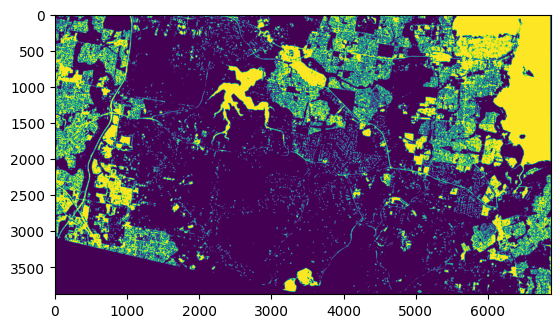

In [ ]:
# image quickplot of band 1
# confirmed data for all three images is good (i.e. only zeroes outside of the image boundary)
plt.imshow(raster_data[0,:,:],vmax=255)

In [ ]:
# List of central latitude and longitude coordinates for the field sites
field_sites = [
    (-27.49415846, 152.7408134),  # Field site 1
    (-27.4996146, 152.7388185),  # Field site 2
    (-27.50965686, 152.7975522),  # Field site 3
    (-27.52625347, 152.864255),  # Field site 4
    (-27.52778734, 152.8633343),  # Field site 5
    (-27.53948472, 153.1528979),  # Field site 6
    (-27.53771376, 153.1447333),  # Field site 7
    (-27.52950791, 153.1448171),  # Field site 8
    (-27.55665257, 152.8541602),  # Field site 9
    (-27.55483345, 152.8511169), # Field site 10
    (-27.55482989, 152.8551187),  # Field site 11
    (-27.57918881, 153.1671666),  # Field site 12
]

# Set the buffer to load around the central coordinates, 50m by 20m.
buffer_lat = 0.000180
buffer_lon = 0.000505

In [ ]:
import geopy.distance

In [ ]:
coords_1 = (-27.49415846, 152.7408134-buffer_lon/2)
coords_2 = (-27.49415846, 152.7408134+buffer_lon/2)

print(geopy.distance.geodesic(coords_1, coords_2).km)

coords_1 = (-27.49415846-buffer_lat/2, 152.7408134)
coords_2 = (-27.49415846+buffer_lat/2, 152.7408134)

print(geopy.distance.geodesic(coords_1, coords_2).km)

# now we have our desired bounds

0.04990276373631303
0.01994604178853123


In [ ]:
# Combine central lat,lon with buffer to get area of interest
lat = field_sites[0][0]   # extract 1st set of coords from our field_sites list
lon = field_sites[0][1]

lat_range = (lat - buffer_lat/2, lat + buffer_lat/2)
lon_range = (lon - buffer_lon/2, lon + buffer_lon/2)

print(lat_range, lon_range)

(-27.49424846, -27.49406846) (152.74056090000002, 152.7410659)


In [ ]:
import pyproj

In [ ]:
""" required to convert lat long to local image coord system """
# Define the input coordinate system (WGS 84, which is common for GPS coordinates)
input_crs = pyproj.CRS("EPSG:4326")

# Define the output UTM coordinate system (e.g., UTM Zone 33N with WGS 84 datum)
output_crs = pyproj.CRS("EPSG:32756")  # UTM Zone 33N   # 32756  https://epsg.io/32756  #20356    #7856

# Create a pyproj Transformer for the conversion
transformer = pyproj.Transformer.from_crs(input_crs, output_crs, always_xy=True)


In [ ]:
""" loop to covert all ROI lat longs to Eastings and Northings """
for site_idx, (central_lat, central_lon) in enumerate(field_sites):
    # if site_idx < 2:
        site_name = 'site_'+str(site_idx)
        print(site_name)

        lat_range = (central_lat - buffer_lat/2, central_lat + buffer_lat/2)
        lon_range = (central_lon - buffer_lon/2, central_lon + buffer_lon/2)

                # Convert coordinates
        utm_easting1, utm_northing1 = transformer.transform(lon_range[0], lat_range[0])
        utm_easting2, utm_northing2 = transformer.transform(lon_range[1], lat_range[1])

        print(lat_range,lon_range)

        print(utm_easting1,utm_northing1, utm_easting2,utm_northing1, utm_easting2, utm_northing2, utm_easting1,utm_northing2, utm_easting1,utm_northing1)


site_0
(-27.49424846, -27.49406846) (152.74056090000002, 152.7410659)
474373.1396940462 6958793.479503897 474422.98115276534 6958793.479503897 474422.98115276534 6958813.521860968 474373.1396940462 6958813.521860968 474373.1396940462 6958793.479503897
site_1
(-27.4997046, -27.4995246) (152.73856600000002, 152.739071)
474177.3600089082 6958188.701751143 474227.1986845086 6958188.701751143 474227.1986845086 6958208.744941512 474177.3600089082 6958208.744941512 474177.3600089082 6958188.701751143
site_2
(-27.50974686, -27.50956686) (152.79729970000002, 152.7978047)
479980.5015580247 6957087.194643834 480030.3450128216 6957087.194643834 480030.3450128216 6957107.214224558 479980.5015580247 6957107.214224558 479980.5015580247 6957087.194643834
site_3
(-27.52634347, -27.52616347) (152.86400250000003, 152.8645075)
486570.36386002146 6955257.822312279 486620.2104388763 6955257.822312279 486620.2104388763 6955277.815102797 486570.36386002146 6955277.815102797 486570.36386002146 6955257.82231227

In [ ]:
""" loop over tiff files to determine if ROI within image extent """
im_list = [r'/content/gdrive/MyDrive/Masters Files/Combined/SVM_Classification_Kholo_222f_22092023.tif',
            r'/content/gdrive/MyDrive/Masters Files/Combined/SVM_Classification_Burbank_44_22092023.tif',]

In [ ]:
import shapely.geometry as shp
from matplotlib.patches import Polygon
import rasterio
from rasterio.plot import show

In [ ]:
from shapely.geometry import shape

In [ ]:
roi_polygon = geojson.Polygon([[(utm_easting1, utm_northing1), (utm_easting2, utm_northing1), (utm_easting2, utm_northing2), (utm_easting1, utm_northing2), (utm_easting1, utm_northing1)]])

In [ ]:
roi_coordinates = [(utm_easting1, utm_northing1), (utm_easting2, utm_northing1), (utm_easting2, utm_northing2), (utm_easting1, utm_northing2), (utm_easting1, utm_northing1)]
roi_polygon = shape({"type": "Polygon", "coordinates": [roi_coordinates]})
roi_coordinates

[(516474.7268775898, 6949390.538959475),
 (516524.59835553356, 6949390.538959475),
 (516524.59835553356, 6949410.409986593),
 (516474.7268775898, 6949410.409986593),
 (516474.7268775898, 6949390.538959475)]

In [ ]:
import shapely

In [ ]:
# Define a list of different roi_coordinates
roi_coordinates = [(utm_easting1, utm_northing1), (utm_easting2, utm_northing1), (utm_easting2, utm_northing2), (utm_easting1, utm_northing2), (utm_easting1, utm_northing1)]

roi_coordinates_list = [
    [(474373.1396940462, 6958793.479503897), (474422.98115276534, 6958793.479503897), (474422.98115276534, 6958813.521860968), (474373.1396940462, 6958813.521860968), (474373.1396940462, 6958793.479503897)],  #site 1
    [(474177.3600089082, 6958188.701751143), (474227.1986845086, 6958188.701751143), (474227.1986845086, 6958208.744941512), (474177.3600089082, 6958208.744941512), (474177.3600089082, 6958188.701751143)],  #site 2
    [(479980.5015580247, 6957087.194643834), (480030.3450128216, 6957087.194643834), (480030.3450128216, 6957107.214224558), (479980.5015580247, 6957107.214224558), (479980.5015580247, 6957087.194643834)],  #site 3
    [(486570.36386002146, 6955257.822312279), (486620.2104388763, 6955257.822312279), (486620.2104388763, 6955277.815102797), (486570.36386002146, 6955277.815102797), (486570.36386002146, 6955257.822312279)],  #site 4
    [(486479.6330743453, 6955087.818947073), (486529.4788129839, 6955087.818947073), (486529.4788129839, 6955107.81211484), (486479.6330743453, 6955107.81211484), (486479.6330743453, 6955087.818947073)],  #site 5
    [(515071.79912966565, 6953790.311239585), (515121.6861906159, 6953790.311239585), (515121.6861906159, 6953810.187951414), (515071.79912966565, 6953810.187951414), (515071.79912966565, 6953790.311239585)],  #site 6
    [(514265.8760246999, 6953987.443283137), (514315.76255935855, 6953987.443283137), (514315.76255935855, 6954007.3232734185), (514265.8760246999, 6954007.3232734185), (514265.8760246999, 6953987.443283137)],  #site 7
    [(514275.21052023943, 6954896.378012182), (514325.100765495, 6954896.378012182), (514325.100765495, 6954916.257956941), (514275.21052023943, 6954916.257956941), (514275.21052023943, 6954896.378012182)],  #site 8
    [(485577.4798407507, 6951889.441260086), (485627.31106133614, 6951889.441260086), (485627.31106133614, 6951909.438246933), (485577.4798407507, 6951909.438246933), (485577.4798407507, 6951889.441260086)],  #site 9
    [(485276.7962368901, 6952090.5838473365), (485326.6277945362, 6952090.5838473365), (485326.6277945362, 6952110.58205295), (485276.7962368901, 6952110.58205295), (485276.7962368901, 6952090.5838473365)],  #site 10
    [(485671.8683827403 , 6952091.447508252), (485721.70058106194, 6952091.447508252), (485721.70058106194, 6952111.444100948), (485671.8683827403, 6952111.444100948), (485671.8683827403, 6952091.447508252)],  #site 11
    [(516474.7268775898, 6949390.538959475), (516524.59835553356, 6949390.538959475), (516524.59835553356, 6949410.409986593), (516474.7268775898, 6949410.409986593), (516474.7268775898, 6949390.538959475)],  #site 12
    # Add more ROI coordinates as needed
]

# Iterate over GeoTIFF files in im_list
for geotiff_path in im_list:
    # Open the GeoTIFF using rasterio
    print(geotiff_path)
    with rasterio.open(geotiff_path) as dataset:
        # Get the extent (bounding box) of the image as a shapely polygon
        im_bounds = dataset.bounds
        im_polygon = shapely.geometry.box(im_bounds[0], im_bounds[1], im_bounds[2], im_bounds[3])

    # Iterate over different ROI coordinates
    for roi_coordinates in roi_coordinates_list:
        roi_polygon = shape({"type": "Polygon", "coordinates": [roi_coordinates]})

        # Check if the current ROI polygon intersects with the image extent
        roi_within_image = roi_polygon.intersects(im_polygon)

        # Print the result
        if roi_within_image:
            print("study site intersects with the GeoTIFF extent.")
        else:
            print("study site does not intersect with the GeoTIFF extent.")

/content/gdrive/MyDrive/Masters Files/Combined/SVM_Classification_Kholo_222f_22092023.tif
study site intersects with the GeoTIFF extent.
study site intersects with the GeoTIFF extent.
study site intersects with the GeoTIFF extent.
study site intersects with the GeoTIFF extent.
study site intersects with the GeoTIFF extent.
study site does not intersect with the GeoTIFF extent.
study site does not intersect with the GeoTIFF extent.
study site does not intersect with the GeoTIFF extent.
study site intersects with the GeoTIFF extent.
study site intersects with the GeoTIFF extent.
study site intersects with the GeoTIFF extent.
study site does not intersect with the GeoTIFF extent.
/content/gdrive/MyDrive/Masters Files/Combined/SVM_Classification_Burbank_44_22092023.tif
study site does not intersect with the GeoTIFF extent.
study site does not intersect with the GeoTIFF extent.
study site does not intersect with the GeoTIFF extent.
study site does not intersect with the GeoTIFF extent.
stud

In [ ]:
import rasterio.mask
from rasterio.mask import mask

In [ ]:
# Define class values for Other, Grasses, and Forest
class_values = [127, 255, 139]

# Define a list that maps ROIs to field sites (1-10)
field_sites = [1, 2, 3, 4, 5, 6, 7, 8, 10]

# Create a dictionary to store class values for each field site
field_site_class_values = {field_site: [] for field_site in field_sites}

# Iterate over GeoTIFF files in im_list
for geotiff_path in im_list:
    # Open the GeoTIFF using rasterio
    with rasterio.open(geotiff_path) as dataset:
        # Get the extent (bounding box) of the image as a shapely polygon
        im_bounds = dataset.bounds
        im_polygon = shapely.geometry.box(im_bounds[0], im_bounds[1], im_bounds[2], im_bounds[3])

        # Initialize ROI index
        roi_index = 0

        # Iterate over different ROI coordinates and their corresponding field sites
        for roi_coordinates, field_site in zip(roi_coordinates_list, field_sites):
            roi_polygon = shape({"type": "Polygon", "coordinates": [roi_coordinates]})

            # Check if the current ROI Polygon intersects with the image extent
            if roi_polygon.intersects(im_polygon):
                # Extract the ROI geometry
                with rasterio.open(geotiff_path) as roi_dataset:
                    masked_data, masked_transform = mask(roi_dataset, [roi_polygon], crop=True)

                    # Select the second band from the masked_data (assuming 0-based indexing)
                    band_data = masked_data[1]

                    # Iterate through each pixel in the band
                    for row in range(band_data.shape[0]):
                        for col in range(band_data.shape[1]):
                            pixel_value = band_data[row, col]
                            if pixel_value in class_values:
                                # Append the class value to the corresponding field site's list
                                field_site_class_values[field_site].append(pixel_value)

                    # Increment ROI index
                    roi_index += 1

# Now, field_site_class_values contains the class values for each field site (1-12)
for field_site, class_values in field_site_class_values.items():
    print(f"Field Site {field_site}: Class Values =", class_values)

Field Site 1: Class Values = [255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255, 255]
Field Site 2: Class Values = [139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 

In [ ]:
# Define class values for Other, Grasses, and Forest
class_values = [127, 255, 139]

# Iterate over GeoTIFF files in im_list
for geotiff_path in im_list:
    # Open the GeoTIFF using rasterio
    with rasterio.open(geotiff_path) as dataset:
        # Get the extent (bounding box) of the image as a shapely polygon
        im_bounds = dataset.bounds
        im_polygon = shapely.geometry.box(im_bounds[0], im_bounds[1], im_bounds[2], im_bounds[3])

        # Iterate over different ROI coordinates
        for roi_coordinates in roi_coordinates_list:
            roi_polygon = shape({"type": "Polygon", "coordinates": [roi_coordinates]})

            # Check if the current ROI Polygon intersects with the image extent
            if roi_polygon.intersects(im_polygon):
                # Extract the ROI geometry
                with rasterio.open(geotiff_path) as roi_dataset:
                    masked_data, masked_transform = mask(roi_dataset, [roi_polygon], crop=True)

                    # Select the second band from the masked_data (assuming 0-based indexing)
                    band_data = masked_data[1]

                    # Initialize counts for each class
                    class_counts = {class_value: 0 for class_value in class_values}

                    # Iterate through each pixel in the band
                    for row in range(band_data.shape[0]):
                        for col in range(band_data.shape[1]):
                            pixel_value = band_data[row, col]
                            if pixel_value in class_values:
                                class_counts[pixel_value] += 1

                    # Calculate total pixel count within the ROI
                    total_pixel_count = band_data.size

                    # Calculate the proportion of each class within the ROI
                    proportions = {class_value: count / total_pixel_count for class_value, count in class_counts.items()}

                    # Now, 'proportions' contains the proportion of each class within the current ROI
                    print("Proportions in ROI:", proportions)

Proportions in ROI: {127: 0.0, 255: 0.875, 139: 0.0}
Proportions in ROI: {127: 0.0, 255: 0.0, 139: 1.0}
Proportions in ROI: {127: 0.0, 255: 0.0, 139: 0.8888888888888888}
Proportions in ROI: {127: 0.0, 255: 0.0, 139: 1.0}
Proportions in ROI: {127: 0.0, 255: 0.0, 139: 0.6666666666666666}
Proportions in ROI: {127: 0.0, 255: 0.0, 139: 0.875}
Proportions in ROI: {127: 0.0, 255: 0.0, 139: 0.7083333333333334}
Proportions in ROI: {127: 0.0, 255: 0.0, 139: 0.6666666666666666}
Proportions in ROI: {127: 0.0, 255: 0.0, 139: 0.8888888888888888}
Proportions in ROI: {127: 0.0, 255: 0.0, 139: 0.7083333333333334}
Proportions in ROI: {127: 0.0, 255: 0.0661764705882353, 139: 0.6838235294117647}
Proportions in ROI: {127: 0.0, 255: 0.6544117647058824, 139: 0.09558823529411764}


In [ ]:

# Number of field sites
num_field_sites = 12

# Create an empty numpy array with 3 rows (for Other, Grasses, Forest) and 12 columns (for field sites)
existing_array = np.zeros((3, num_field_sites))

# Proportions in ROI (replace these with your actual values)
proportions_in_roi = [
    {127: 0.0, 255: 0.875, 139: 0.0},
    {127: 0.0, 255: 0.0, 139: 1.0},
    {127: 0.0, 255: 0.0, 139: 0.8888888888888888},
    # Add more proportions as needed
]

# Iterate over the proportions and update the numpy array
for i, proportions in enumerate(proportions_in_roi):
    existing_array[0, i] = proportions.get(127, 0.0)  # Other
    existing_array[1, i] = proportions.get(255, 0.0)  # Grasses
    existing_array[2, i] = proportions.get(139, 0.0)  # Forest

print(existing_array)

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.        ]
 [0.875      0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.        ]
 [0.         1.         0.88888889 0.         0.         0.
  0.         0.         0.         0.         0.         0.        ]]


In [ ]:
# Number of field sites
sites = 12

# Create an empty numpy array with 3 rows (for Other, Grasses, Forest) and 12 columns (for field sites)
existing_array = np.zeros((3, sites))

# Proportions in ROI (replace these with your actual values)
proportions_in_roi = [
    {'OTHER': 0.0, 'GRASSES': 0.875, 'FOREST': 0.0},
    {'OTHER': 0.0, 'GRASSES': 0.0, 'FOREST': 1.0},
    {'OTHER': 0.0, 'GRASSES': 0.0, 'FOREST': 0.8888888888888888},
    {'OTHER': 0.0, 'GRASSES': 0.0, 'FOREST': 1.0},
    {'OTHER': 0.0, 'GRASSES': 0.0, 'FOREST': 0.6666666666666666},
    {'OTHER': 0.0, 'GRASSES': 0.0, 'FOREST': 0.875},
    {'OTHER': 0.0, 'GRASSES': 0.0, 'FOREST': 0.7083333333333334},
    {'OTHER': 0.0, 'GRASSES': 0.0, 'FOREST': 0.6666666666666666},
    {'OTHER': 0.0, 'GRASSES': 0.0, 'FOREST': 0.8888888888888888},
    {'OTHER': 0.0, 'GRASSES': 0.0, 'FOREST': 0.7083333333333334},
    {'OTHER': 0.0, 'GRASSES': 0.0661764705882353, 'FOREST': 0.6838235294117647},
    {'OTHER': 0.0, 'GRASSES': 0.6544117647058824, 'FOREST': 0.09558823529411764},
    # Add more proportions as needed
]

# Iterate over the proportions and update the numpy array
for i, proportions in enumerate(proportions_in_roi):
    existing_array[0, i] = proportions.get('OTHER', 0.0)  # Other
    existing_array[1, i] = proportions.get('GRASSES', 0.0)  # Grasses
    existing_array[2, i] = proportions.get('FOREST', 0.0)  # Forest

print(existing_array)

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.        ]
 [0.875      0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.06617647 0.65441176]
 [0.         1.         0.88888889 1.         0.66666667 0.875
  0.70833333 0.66666667 0.88888889 0.70833333 0.68382353 0.09558824]]


In [ ]:
import pandas as pd

In [ ]:
import pandas as pd
import numpy as np

# Your existing numpy array with actual data
existing_array = np.array([
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],  # OTHER
    [0.875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0661764705882353, 0.6544117647058824],  # GRASSES
    [0.0, 1.0, 0.8888888888888888, 1.0, 0.6666666666666666, 0.875, 0.7083333333333334, 0.6666666666666666, 0.8888888888888888, 0.7083333333333334, 0.6838235294117647, 0.09558823529411764]  # FOREST
])

# Create a DataFrame
new_df = pd.DataFrame(existing_array, columns=['Site_{}'.format(i) for i in range(1, 13)])  # Adjusted for 12 sites
new_df.index = ['OTHER', 'GRASSES', 'FOREST']

# Display the DataFrame
print(new_df)

         Site_1  Site_2    Site_3  Site_4    Site_5  Site_6    Site_7  \
OTHER     0.000     0.0  0.000000     0.0  0.000000   0.000  0.000000   
GRASSES   0.875     0.0  0.000000     0.0  0.000000   0.000  0.000000   
FOREST    0.000     1.0  0.888889     1.0  0.666667   0.875  0.708333   

           Site_8    Site_9   Site_10   Site_11   Site_12  
OTHER    0.000000  0.000000  0.000000  0.000000  0.000000  
GRASSES  0.000000  0.000000  0.000000  0.066176  0.654412  
FOREST   0.666667  0.888889  0.708333  0.683824  0.095588  


In [ ]:
new_df

,Site_1,Site_2,Site_3,Site_4,Site_5,Site_6,Site_7,Site_8,Site_9,Site_10,Site_11,Site_12
OTHER,0.000,0.0,0.000000,0.0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
GRASSES,0.875,0.0,0.000000,0.0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.066176,0.654412
FOREST,0.000,1.0,0.888889,1.0,0.666667,0.875,0.708333,0.666667,0.888889,0.708333,0.683824,0.095588


In [ ]:
Final_DF_Class = new_df
Final_DF_Class

,Site_1,Site_2,Site_3,Site_4,Site_5,Site_6,Site_7,Site_8,Site_9,Site_10,Site_11,Site_12
OTHER,0.000,0.0,0.000000,0.0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
GRASSES,0.875,0.0,0.000000,0.0,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.066176,0.654412
FOREST,0.000,1.0,0.888889,1.0,0.666667,0.875,0.708333,0.666667,0.888889,0.708333,0.683824,0.095588


In [ ]:
import numpy.ma as ma

In [ ]:
import pandas as pd

In [ ]:
import pandas as pd
data = pd.read_csv("P.SD_all_sites.csv")
data

,Unnamed: 0,Site_1,Site_2,Site_3,Site_4,Site_5,Site_6,Site_7,Site_8,Site_9,Site_10,Site_11,Site_12
0,EVI,0.354467,0.405451,0.390741,0.363513,0.375850,0.308975,0.385455,0.439308,0.300425,0.430847,0.427828,0.372794
1,Coastal_Blue,380.352941,211.731092,156.223214,169.554622,154.750000,289.625000,287.676471,372.529412,253.117647,157.058824,165.854167,500.519608
2,Blue,474.008403,246.403361,203.812500,230.613445,189.958333,302.330357,297.941176,416.941176,338.764706,202.186275,217.291667,560.627451
3,Green_I,673.731092,350.613445,282.133929,311.050420,244.270833,383.428571,350.313725,506.509804,476.000000,307.588235,297.562500,682.009804
4,Green,780.008403,398.134454,318.330357,356.344538,270.541667,442.991071,395.539216,578.568627,537.546218,362.892157,338.500000,792.960784
5,Yellow,792.915966,400.764706,302.937500,366.621849,271.197917,460.785714,440.754902,636.421569,530.638655,317.029412,327.708333,919.441176
6,Red,807.075630,379.714286,266.151786,351.764706,242.052083,358.535714,393.313725,598.598039,529.042017,260.362745,302.125000,905.490196
7,Red_Edge,1262.747899,687.806723,616.821429,737.025210,504.020833,779.526786,764.323529,1017.127451,1055.974790,670.784314,627.572917,1382.794118
8,NIR,2915.613445,1946.109244,2234.401786,2677.924370,1703.239583,2272.830357,2541.617647,2736.117647,2858.705882,2529.764706,2197.333333,3000.627451


In [ ]:
len(data)

9

In [ ]:
df = data

In [ ]:
# Sample DataFrame (replace with your actual DataFrame)
data = {
    'Unnamed: 0': ['EVI', 'Coastal_Blue', 'Blue', 'Green_I', 'Green', 'Yellow', 'Red', 'Red_Edge', 'NIR', 'OTHER', 'GRASSES', 'FOREST'],
    'Site_1': [0.354467, 380.352941, 474.008403, 673.731092, 780.008403, 792.915966, 807.075630, 1262.747899, 2915.613445, 0.0, 0.875, 0.0],
    'Site_2': [0.405451, 211.731092, 246.403361, 350.613445, 398.134454, 400.764706, 379.714286, 687.806723, 1946.109244, 0.0, 0.0, 1.0],
    'Site_3': [0.390741, 156.223214, 203.812500, 282.133929, 318.330357, 302.937500, 266.151786, 616.821429, 2234.401786, 0.0, 0.0, 0.888889],
    'Site_4': [0.363513, 169.554622, 230.613445, 311.050420, 356.344538, 366.621849, 351.764706, 737.025210, 2677.924370, 0.0, 0.0, 1.0],
    'Site_5': [0.375850, 154.750000, 189.958333, 244.270833, 270.541667, 271.197917, 242.052083, 504.020833, 1703.239583, 0.0, 0.0, 0.666667],
    'Site_6': [0.308975, 289.625000, 302.330357, 383.428571, 442.991071, 460.785714, 358.535714, 779.526786, 2272.830357, 0.0, 0.0, 0.875],
    'Site_7': [0.385455, 287.676471, 297.941176, 350.313725, 395.539216, 440.754902, 393.313725, 764.323529, 2541.617647, 0.0, 0.0, 0.708333],
    'Site_8': [0.439308, 372.529412, 416.941176, 506.509804, 578.568627, 636.421569, 598.598039, 1017.127451, 2736.117647, 0.0, 0.0, 0.666667],
    'Site_9': [0.300425, 253.117647, 338.764706, 476.000000, 537.546218, 530.638655, 529.042017, 1055.974790, 2858.705882, 0.0, 0.0, 0.888889],
    'Site_10': [0.430847, 157.058824, 202.186275, 307.588235, 362.892157, 317.029412, 260.362745, 670.784314, 2529.764706, 0.0, 0.0, 0.708333],
    'Site_11': [0.427828, 165.854167, 217.291667, 297.562500, 338.500000, 327.708333, 302.125000, 627.572917, 2197.333333, 0.0, 0.066176, 0.683824],
    'Site_12': [0.372794, 500.519608, 560.627451, 682.009804, 792.960784, 919.441176, 905.490196, 1382.794118, 3000.627451, 0.0, 0.654412, 0.095588]
}

# Create the DataFrame
df = pd.DataFrame(data)

# Replace the index with '9', '10', '11'
df.set_index('Unnamed: 0', inplace=True)

# Rename the columns if needed
# df = df.rename(columns={'Unnamed: 0': 'RowNames'})

# The DataFrame now has the index values '9', '10', '11'.

In [ ]:
df

,Site_1,Site_2,Site_3,Site_4,Site_5,Site_6,Site_7,Site_8,Site_9,Site_10,Site_11,Site_12
Unnamed: 0,,,,,,,,,,,,
EVI,0.354467,0.405451,0.390741,0.363513,0.375850,0.308975,0.385455,0.439308,0.300425,0.430847,0.427828,0.372794
Coastal_Blue,380.352941,211.731092,156.223214,169.554622,154.750000,289.625000,287.676471,372.529412,253.117647,157.058824,165.854167,500.519608
Blue,474.008403,246.403361,203.812500,230.613445,189.958333,302.330357,297.941176,416.941176,338.764706,202.186275,217.291667,560.627451
Green_I,673.731092,350.613445,282.133929,311.050420,244.270833,383.428571,350.313725,506.509804,476.000000,307.588235,297.562500,682.009804
Green,780.008403,398.134454,318.330357,356.344538,270.541667,442.991071,395.539216,578.568627,537.546218,362.892157,338.500000,792.960784
Yellow,792.915966,400.764706,302.937500,366.621849,271.197917,460.785714,440.754902,636.421569,530.638655,317.029412,327.708333,919.441176
Red,807.075630,379.714286,266.151786,351.764706,242.052083,358.535714,393.313725,598.598039,529.042017,260.362745,302.125000,905.490196
Red_Edge,1262.747899,687.806723,616.821429,737.025210,504.020833,779.526786,764.323529,1017.127451,1055.974790,670.784314,627.572917,1382.794118
NIR,2915.613445,1946.109244,2234.401786,2677.924370,1703.239583,2272.830357,2541.617647,2736.117647,2858.705882,2529.764706,2197.333333,3000.627451


In [ ]:
Final_df = df.T

In [ ]:
Final_df

Unnamed: 0,EVI,Coastal_Blue,Blue,Green_I,Green,Yellow,Red,Red_Edge,NIR,OTHER,GRASSES,FOREST
Site_1,0.354467,380.352941,474.008403,673.731092,780.008403,792.915966,807.075630,1262.747899,2915.613445,0.0,0.875000,0.000000
Site_2,0.405451,211.731092,246.403361,350.613445,398.134454,400.764706,379.714286,687.806723,1946.109244,0.0,0.000000,1.000000
Site_3,0.390741,156.223214,203.812500,282.133929,318.330357,302.937500,266.151786,616.821429,2234.401786,0.0,0.000000,0.888889
Site_4,0.363513,169.554622,230.613445,311.050420,356.344538,366.621849,351.764706,737.025210,2677.924370,0.0,0.000000,1.000000
Site_5,0.375850,154.750000,189.958333,244.270833,270.541667,271.197917,242.052083,504.020833,1703.239583,0.0,0.000000,0.666667
Site_6,0.308975,289.625000,302.330357,383.428571,442.991071,460.785714,358.535714,779.526786,2272.830357,0.0,0.000000,0.875000
Site_7,0.385455,287.676471,297.941176,350.313725,395.539216,440.754902,393.313725,764.323529,2541.617647,0.0,0.000000,0.708333
Site_8,0.439308,372.529412,416.941176,506.509804,578.568627,636.421569,598.598039,1017.127451,2736.117647,0.0,0.000000,0.666667
Site_9,0.300425,253.117647,338.764706,476.000000,537.546218,530.638655,529.042017,1055.974790,2858.705882,0.0,0.000000,0.888889
Site_10,0.430847,157.058824,202.186275,307.588235,362.892157,317.029412,260.362745,670.784314,2529.764706,0.0,0.000000,0.708333


In [ ]:
len(Final_df)

12

In [ ]:
Final_df.dtypes

Unnamed: 0
EVI             float64
Coastal_Blue    float64
Blue            float64
Green_I         float64
Green           float64
Yellow          float64
Red             float64
Red_Edge        float64
NIR             float64
OTHER           float64
GRASSES         float64
FOREST          float64
dtype: object

In [ ]:
print(df.columns)

Index(['Site_1', 'Site_2', 'Site_3', 'Site_4', 'Site_5', 'Site_6', 'Site_7',
       'Site_8', 'Site_9', 'Site_10', 'Site_11', 'Site_12'],
      dtype='object')


In [ ]:
pip install openpyxl # required to open xlsx files

In [ ]:
""" load reference data """
ref_df = pd.read_excel('Field Survey Data_FINAL.xlsx',sheet_name='Sheet2')

In [ ]:
""" load reference data """
ref_df2 = pd.read_excel('Field Survey Data_FINAL.xlsx',sheet_name='Sheet1')

In [ ]:
filtered_df = ref_df2[(ref_df2['Remnant Status'] == 'remnant') & (ref_df2['EDL'] != 'Water')]   # filter the df for an auto loop

In [ ]:
ref_df

,Site #,Dataset (DS) Index for Python,Latitude (GDA2020),Longitude (GDA2020),Date,Remnant Status,Desktop RE,Groundtruthed RE,VHC,Vegetation Condition Class,...,S2 Cover (%),S2 Species,Basal Area,Ground Layer Notes,Dominant Groundcover,Surface Fine Fuels Average (%),Near Surface Fine Fuels Average (%),Litter Depth Average (mm),General Site Notes,Incidental Flora
0,1,0,27.494158,152.740813,2022-09-07,nonremnant (cleared),Nonremnant,Nonremnant,39.b,7,...,NaN,NaN,0,"Dominated by managed non native grass, cleared...",Poaceae Unknown,100.0,100.0,1.0,"Dominated by managed non native grass, cleared...",NaN
1,2,1,27.499615,152.738818,2022-09-07,regrowth,12.11.6,Regrowth 12.11.6,10.2,3,...,0.0,NaN,11,Dominated by exotic species such as Melinis re...,"Ageratum houstonianum (exotic),Bidens pilosa (...",100.0,99.0,36.0,Regrowth on the edge of a cleared patch and un...,NaN
2,3,2,27.509657,152.797552,2022-09-07,remnant,12.11.3a,12.11.3a,9.2,1,...,0.0,NaN,14,Dominated by lantana montevensis with billy go...,NaN,99.0,34.0,24.0,In a gully / low lying area next to an ephemer...,NaN
3,4,3,27.526253,152.864255,2022-08-31,remnant,12.11.5,12.11.5,10.1,1,...,0.0,NaN,10,NaN,"Aristida sp.,Lomandra multiflora,Themeda triandra",9.0,86.8,9.0,NaN,"Achyranthes aspera,Cymbopogon refractus,Entola..."
4,5,4,27.527787,152.863334,2022-08-31,remnant,12.11.3,12.11.5,10.1,1,...,0.0,NaN,23,NaN,"Entolasia stricta,Lomandra confertifolia,Theme...",8.0,81.0,13.0,NaN,"Dianella sp.,Hibbertia sp.,Senecio sp."
5,6,5,27.539485,153.152898,2022-08-30,remnant,12.910.22,12.910.22,22.5,1,...,7.0,"Pultenaea robusta, Melaleuca sp., Leptospermum...",4,Dominated by Shoenus brevifolius,Shoenus brevifolius,2.6,56.0,9.2,NaN,"Burchardia umbellata,Cassytha sp.,Drosera sp.,..."
6,7,6,27.537714,153.144733,2022-08-30,remnant,12.910.4,12.910.4,9.2,2,...,0.0,NaN,14,NaN,"Cymbopogon refractus,Gahnia sp.,Imperata cylin...",21.0,56.0,9.0,NaN,Platylobium formosum
7,8,7,27.529508,153.144817,2022-08-30,nonremnant (cleared),Nonremnant,Nonremnant,39.a,3,...,0.0,NaN,4,NaN,"Eragrostis sp.,Festuca sp.,Gahnia sp.,Lomandra...",21.4,19.0,25.0,Transect is upslope,Entolasia stricta
8,9,8,27.556653,152.854160,2022-08-31,nonremnant (cleared),Non remnant,Non remnant,39.a,6,...,0.0,NaN,0,NaN,"Ageratum conyzoides (exotic),Bidens pilosa (ex...",3.4,58.0,5.0,NaN,"Ageratum conyzoides (exotic),Bidens pilosa (ex..."
9,10,9,27.554833,152.851117,2022-08-31,regrowth,12.3.3,Rehabilitated 12.3.7/12.3.3,16.1,4,...,0.0,NaN,9,NaN,"Cardiospermum grandiflorum (exotic),Commelina ...",13.0,77.0,7.0,NaN,"Asparagus africanus (exotic),Lantana camara (e..."


In [ ]:
filtered_df = ref_df2[(ref_df2['Remnant Status'] == 'remnant') & (ref_df2['EDL'] != 'Water')]   # filter the df for an auto loop

In [ ]:
filtered_df

,Unnamed: 0,Sequence,Latitude (GDA2020),Longitude (GDA2020),Site name,Date,Time,Collector(s),Remnant Status,Desktop RE,...,S2 Cover (%),S2 Species,Basal Area,Ground Layer Notes,Dominant Groundcover,Surface Fine Fuels Average (%),Near Surface Fine Fuels Average (%),Litter Depth Average (mm),General Site Notes,Incidental Flora
3,NaN,NaN,27.498831,152.814717,56s.4816996958299,2022-09-07,0.559028,"Gina Minatel,Katelyn Gibson",remnant,12.12.15b,...,0.0,NaN,23.0,Dominated by mostly native species with a thic...,"Chrysocephalum apiculatum,Lantana montevidensi...",99,35.0,38.0,"Site located on a slope, open understory with ...",NaN
4,NaN,3.0,27.509657,152.797552,56s.479999.6957099,2022-09-07,0.438194,"Gina Minatel,Katelyn Gibson",remnant,12.11.3a,...,0.0,NaN,14.0,Dominated by lantana montevensis with billy go...,NaN,99,34.0,24.0,In a gully / low lying area next to an ephemer...,NaN
5,NaN,4.0,27.510465,152.776266,56s.477899.6956999,2022-09-07,0.361111,"Gina Minatel,Katelyn Gibson",remnant,12.11.6,...,0.0,NaN,16.0,Dominated by lantana montdevensis forming a ma...,NaN,80.6,63.0,12.4,NaN,NaN
6,NaN,5.0,27.526253,152.864255,56s.486599.6955299,2022-08-31,0.474306,"Gillian Turner,Jacinta Harrison",remnant,12.11.5,...,0.0,NaN,10.0,NaN,"Aristida sp.,Lomandra multiflora,Themeda triandra",9,86.8,9.0,NaN,"Achyranthes aspera,Cymbopogon refractus,Entola..."
7,NaN,6.0,27.527787,152.863334,56s.486499.6955099,2022-08-31,0.474306,"Gillian Turner,Jacinta Harrison",remnant,12.11.3,...,0.0,NaN,23.0,NaN,"Entolasia stricta,Lomandra confertifolia,Theme...",8,81.0,13.0,NaN,"Dianella sp.,Hibbertia sp.,Senecio sp."
8,NaN,7.0,27.539485,153.152898,56s.515099.6953799,2022-08-30,0.159028,"David Gatfield,Jacinta Harrison",remnant,12.910.22,...,7.0,"Pultenaea robusta, Melaleuca sp., Leptospermum...",4.0,Dominated by Shoenus brevifolius,Shoenus brevifolius,2.6,56.0,9.2,NaN,"Burchardia umbellata,Cassytha sp.,Drosera sp.,..."
9,NaN,8.0,27.537714,153.144733,56s.514299.6953999,2022-08-30,0.284028,"David Gatfield,Jacinta Harrison",remnant,12.910.4,...,0.0,NaN,14.0,NaN,"Cymbopogon refractus,Gahnia sp.,Imperata cylin...",21,56.0,9.0,NaN,Platylobium formosum
10,NaN,NaN,27.535878,153.146843,56s.51499.6954199,2022-08-30,0.417361,"David Gatfield,Jacinta Harrison",remnant,12.11.24,...,0.0,NaN,9.0,NaN,"Cymbopogon refractus,Lomandra sp.",32,37.0,52.5,NaN,Passiflora sp.
21,NaN,NaN,27.498010,153.112394,56s.511099.6958399,2022-09-01,0.270833,"Gina Minatel,Katelyn Gibson",remnant,12.11.14,...,0.0,NaN,7.0,Dense weedy ground cover layer,"Ageratum houstonianum (exotic),Lantana camara ...",100,90.0,13.0,Dense thicket understory dominated by lantana ...,NaN
23,NaN,NaN,27.543072,153.143786,56s.514199.6953399,2022-08-30,0.740278,"David Gatfield,Jacinta Harrison",remnant,12.3.6,...,0.0,NaN,14.0,NaN,"Gahnia aspera,Xanthorrhoea sp.",11,7.0,40.0,NaN,"Acacia fimbriata,Clematis pickeringii,Lantana ..."


In [ ]:
filtered_df.to_csv('Filtered_DF.csv')

In [ ]:
""" specify reponse variable """

resp_var1 = pd.to_numeric(ref_df["Litter Depth Average (mm)"].values)

In [ ]:
resp_var1

array([ 1. , 36. , 24. ,  9. , 13. ,  9.2,  9. , 25. ,  5. ,  7. ,  9.4,
        1.6])

In [ ]:
print(len(resp_var1))

12


In [ ]:
all_df_pred = Final_df

In [ ]:
all_df_pred

Unnamed: 0,EVI,Coastal_Blue,Blue,Green_I,Green,Yellow,Red,Red_Edge,NIR,OTHER,GRASSES,FOREST
Site_1,0.354467,380.352941,474.008403,673.731092,780.008403,792.915966,807.075630,1262.747899,2915.613445,0.0,0.875000,0.000000
Site_2,0.405451,211.731092,246.403361,350.613445,398.134454,400.764706,379.714286,687.806723,1946.109244,0.0,0.000000,1.000000
Site_3,0.390741,156.223214,203.812500,282.133929,318.330357,302.937500,266.151786,616.821429,2234.401786,0.0,0.000000,0.888889
Site_4,0.363513,169.554622,230.613445,311.050420,356.344538,366.621849,351.764706,737.025210,2677.924370,0.0,0.000000,1.000000
Site_5,0.375850,154.750000,189.958333,244.270833,270.541667,271.197917,242.052083,504.020833,1703.239583,0.0,0.000000,0.666667
Site_6,0.308975,289.625000,302.330357,383.428571,442.991071,460.785714,358.535714,779.526786,2272.830357,0.0,0.000000,0.875000
Site_7,0.385455,287.676471,297.941176,350.313725,395.539216,440.754902,393.313725,764.323529,2541.617647,0.0,0.000000,0.708333
Site_8,0.439308,372.529412,416.941176,506.509804,578.568627,636.421569,598.598039,1017.127451,2736.117647,0.0,0.000000,0.666667
Site_9,0.300425,253.117647,338.764706,476.000000,537.546218,530.638655,529.042017,1055.974790,2858.705882,0.0,0.000000,0.888889
Site_10,0.430847,157.058824,202.186275,307.588235,362.892157,317.029412,260.362745,670.784314,2529.764706,0.0,0.000000,0.708333


In [ ]:
print(len(all_df_pred))

12


Text(0, 0.5, 'ref values')

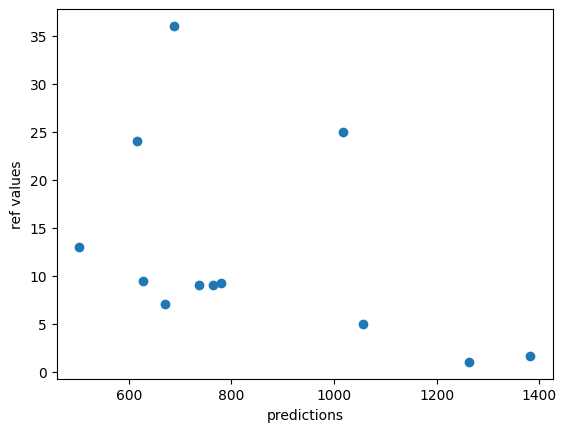

In [ ]:
#plt.scatter(all_df_pred.EVI,resp_var)
plt.scatter(all_df_pred.Red_Edge,resp_var1)
plt.xlabel('predictions')
plt.ylabel('ref values')

In [ ]:
all_df_pred

Unnamed: 0,EVI,Coastal_Blue,Blue,Green_I,Green,Yellow,Red,Red_Edge,NIR,OTHER,GRASSES,FOREST
Site_1,0.354467,380.352941,474.008403,673.731092,780.008403,792.915966,807.075630,1262.747899,2915.613445,0.0,0.875000,0.000000
Site_2,0.405451,211.731092,246.403361,350.613445,398.134454,400.764706,379.714286,687.806723,1946.109244,0.0,0.000000,1.000000
Site_3,0.390741,156.223214,203.812500,282.133929,318.330357,302.937500,266.151786,616.821429,2234.401786,0.0,0.000000,0.888889
Site_4,0.363513,169.554622,230.613445,311.050420,356.344538,366.621849,351.764706,737.025210,2677.924370,0.0,0.000000,1.000000
Site_5,0.375850,154.750000,189.958333,244.270833,270.541667,271.197917,242.052083,504.020833,1703.239583,0.0,0.000000,0.666667
Site_6,0.308975,289.625000,302.330357,383.428571,442.991071,460.785714,358.535714,779.526786,2272.830357,0.0,0.000000,0.875000
Site_7,0.385455,287.676471,297.941176,350.313725,395.539216,440.754902,393.313725,764.323529,2541.617647,0.0,0.000000,0.708333
Site_8,0.439308,372.529412,416.941176,506.509804,578.568627,636.421569,598.598039,1017.127451,2736.117647,0.0,0.000000,0.666667
Site_9,0.300425,253.117647,338.764706,476.000000,537.546218,530.638655,529.042017,1055.974790,2858.705882,0.0,0.000000,0.888889
Site_10,0.430847,157.058824,202.186275,307.588235,362.892157,317.029412,260.362745,670.784314,2529.764706,0.0,0.000000,0.708333


In [ ]:
all_df_pred.to_csv('ENVI_Classified_PlanetScope_imagery_12_Sites.csv')

In [ ]:
all_df_pred.describe(include='all')

Unnamed: 0,EVI,Coastal_Blue,Blue,Green_I,Green,Yellow,Red,Red_Edge,NIR,OTHER,GRASSES,FOREST
count,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.000000,12.0,12.000000,12.000000
mean,0.379638,258.249416,306.739904,405.434363,464.363124,480.601475,449.518827,842.210500,2467.857121,0.0,0.132966,0.681849
std,0.044263,112.196808,119.963850,148.169420,173.803699,205.337061,218.328708,274.839172,402.835248,0.0,0.299409,0.321356
min,0.300425,154.750000,189.958333,244.270833,270.541667,271.197917,242.052083,504.020833,1703.239583,0.0,0.000000,0.000000
25%,0.361251,163.655331,213.921875,305.081801,351.883403,325.038603,293.131696,659.981465,2225.134673,0.0,0.000000,0.666667
50%,0.380653,232.424370,272.172268,350.463585,396.836835,420.759804,369.125000,750.674370,2535.691176,0.0,0.000000,0.708333
75%,0.411045,310.351103,358.308824,483.627451,547.801820,557.084383,546.431022,1026.839286,2766.764706,0.0,0.016544,0.888889
max,0.439308,500.519608,560.627451,682.009804,792.960784,919.441176,905.490196,1382.794118,3000.627451,0.0,0.875000,1.000000


In [ ]:
all_df_pred.dtypes

Unnamed: 0
EVI             float64
Coastal_Blue    float64
Blue            float64
Green_I         float64
Green           float64
Yellow          float64
Red             float64
Red_Edge        float64
NIR             float64
OTHER           float64
GRASSES         float64
FOREST          float64
dtype: object

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Create a Random Forest regressor
rf = RandomForestRegressor(n_estimators=50)

In [ ]:
resp_df1 = pd.DataFrame(index=all_df_pred.index, data = resp_var1, columns=['resp'])

In [ ]:
resp_df1

,resp
Site_1,1.0
Site_2,36.0
Site_3,24.0
Site_4,9.0
Site_5,13.0
Site_6,9.2
Site_7,9.0
Site_8,25.0
Site_9,5.0
Site_10,7.0


In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(all_df_pred, resp_df, test_size=0.5, random_state=42)  # for large sample sizes (ignore here)

X_train = all_df_pred
y_train = resp_df1

rf.fit(X_train, y_train)

# Make prediction
predictions1 = rf.predict(X_train)

<ipython-input-81-e1e152818c32>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


In [ ]:
predictions1

array([ 2.612, 26.076, 19.28 , 14.12 , 15.52 , 10.96 , 10.128, 19.6  ,
        9.084, 10.36 , 12.06 ,  3.032])

In [ ]:
resp_df1.to_csv('Litter_depth_vs_predicted_value_by_Random_Forest_model.csv')

In [ ]:
# Import library for metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [ ]:
""" evaluate model """

# Mean absolute error (MAE)
mae = mean_absolute_error(y_train.values.ravel(), predictions1)

# Mean squared error (MSE)
mse = mean_squared_error(y_train.values.ravel(), predictions1)

# R-squared scores
r2 = r2_score(y_train.values.ravel(), predictions1)

# Print metrics
print('Mean Absolute Error:', round(mae, 2))
print('Mean Squared Error:', round(mse, 2))
print('R-squared scores:', round(r2, 2))

Mean Absolute Error: 3.64
Mean Squared Error: 18.88
R-squared scores: 0.81


<ipython-input-86-02030b8b98fa>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


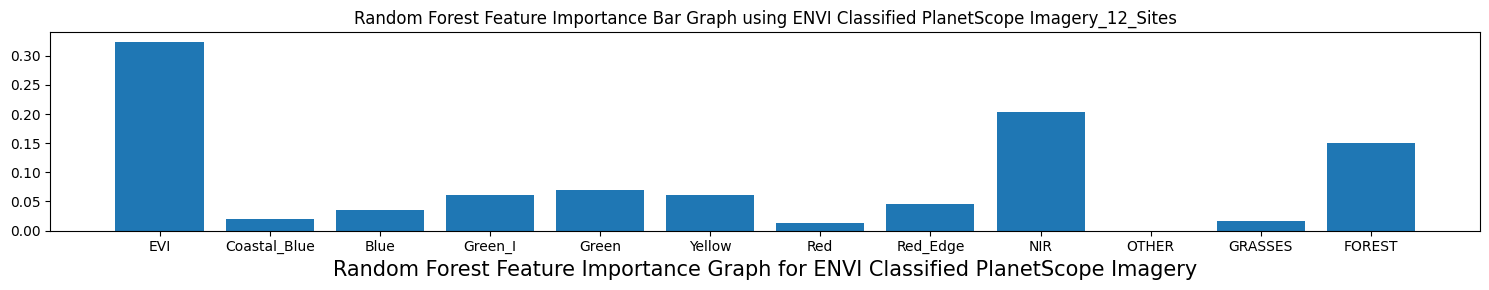

In [ ]:
# Train the model

# X_train = all_df_pred
# y_train = resp_df

rf.fit(X_train, y_train)


fig, ax = plt.subplots(figsize=(15, 3))
X_Variables = X_train.columns
plt.bar(X_Variables, rf.feature_importances_, orientation = 'vertical')
plt.xlabel("Random Forest Feature Importance Graph for ENVI Classified PlanetScope Imagery", fontsize=15)
plt.title('Random Forest Feature Importance Bar Graph using ENVI Classified PlanetScope Imagery_12_Sites')

plt.tight_layout()

In [ ]:
slope, intercept = np.polyfit(predictions1, y_train, 1)

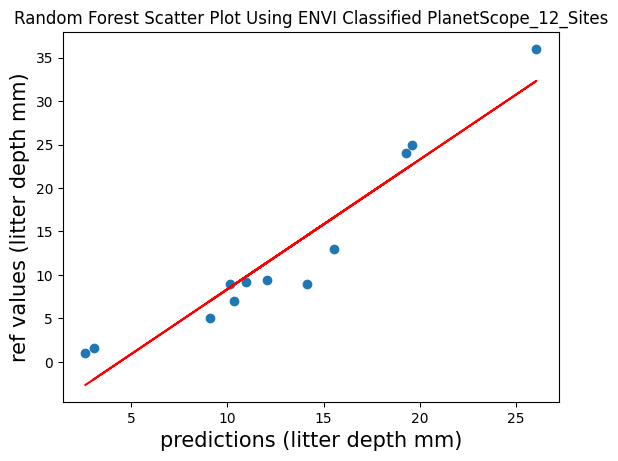

In [ ]:
plt.scatter(predictions1,y_train)
plt.xlabel('predictions (litter depth mm)', fontsize=15)
plt.ylabel('ref values (litter depth mm)', fontsize=15)
plt.title('Random Forest Scatter Plot Using ENVI Classified PlanetScope_12_Sites')
plt.plot(predictions1, slope * predictions1 + intercept, color='red')
plt.savefig('Random Forest Scatter Plot Using ENVI classified PlanetScope Imagery 12 Sites.png')

# Repeating Steps for Transect Start and Transect End and applying Random Forest Regression Analysis

In [ ]:

""" required to convert lat long to local image coord system """
# Define the input coordinate system (WGS 84, which is common for GPS coordinates)
input_crs = pyproj.CRS("EPSG:7844")

# Define the output UTM coordinate system (e.g., UTM Zone 33N with WGS 84 datum)
output_crs = pyproj.CRS("EPSG:32756")  # UTM Zone 33N   # 32756  https://epsg.io/32756  #20356    #7856

# Create a pyproj Transformer for the conversion
transformer = pyproj.Transformer.from_crs(input_crs, output_crs, always_xy=True)

In [ ]:
import numpy as np
import pandas as pd
import pyproj

# Define your coordinate transformation
transformer = pyproj.Transformer.from_crs("epsg:4326", "epsg:32756", always_xy=True)  # Replace 'XX' with the appropriate UTM zone for your region

# Iterate through rows of the DataFrame
for row_v in np.arange(0, len(filtered_df), 1):
    lat_arr = np.array([pd.to_numeric(filtered_df.iloc[row_v, :]['Transect Starts (GDA2020)'].split(',')[0]) * -1,
                        pd.to_numeric(filtered_df.iloc[row_v, :]['Transect End (GDA2020)'].split(',')[0]) * -1])
    lon_arr = np.array([pd.to_numeric(filtered_df.iloc[row_v, :]['Transect Starts (GDA2020)'].split(',')[1]),
                        pd.to_numeric(filtered_df.iloc[row_v, :]['Transect End (GDA2020)'].split(',')[1])])

    # Calculate the latitude and longitude range
    lat_range = (min(lat_arr), max(lat_arr))
    lon_range = (min(lon_arr), max(lon_arr))

    try:
        # Convert coordinates to UTM
        utm_easting1, utm_northing1 = transformer.transform(lon_range[0], lat_range[0])
        utm_easting2, utm_northing2 = transformer.transform(lon_range[1], lat_range[1])

        # Add a 50-meter buffer to northing and a 20-meter buffer to easting
        utm_northing1 += 10 # Add 50 meters to the northing
        utm_northing2 += -10
        utm_easting1 += -25  # Add 20 meters to the easting
        utm_easting2 += 25

        print("Modified Coordinates (Easting, Northing):", utm_easting1, utm_northing1, utm_easting2, utm_northing2)

    except Exception as e:
        print(f"Error processing row {row_v}: {e}")

Modified Coordinates (Easting, Northing): 481650.41165052424 6958303.547044568 481747.910502479 6958284.4521333985
Modified Coordinates (Easting, Northing): 479945.2735266781 6957092.97985312 480042.5463529602 6957082.72536024
Modified Coordinates (Easting, Northing): 477850.23820780823 6957012.436374376 477945.2557828211 6956996.365007638
Modified Coordinates (Easting, Northing): 486541.8961541317 6955274.6543417 486626.5787324647 6955261.752207018
Modified Coordinates (Easting, Northing): 486451.93047601095 6955102.187635154 486542.5902722659 6955093.988555941
Modified Coordinates (Easting, Northing): 515044.0633548761 6953806.139940982 515131.2277367453 6953800.147977162
Modified Coordinates (Easting, Northing): 514252.62347991555 6954001.079817203 514331.38253231876 6953995.708359649
Modified Coordinates (Easting, Northing): 514453.74252226634 6954207.854235923 514544.31618988444 6954200.373669136
Modified Coordinates (Easting, Northing): 511046.112379434 6958402.676109256 511142.5

In [ ]:
filtered_df

,Unnamed: 0,Sequence,Latitude (GDA2020),Longitude (GDA2020),Site name,Date,Time,Collector(s),Remnant Status,Desktop RE,...,S2 Cover (%),S2 Species,Basal Area,Ground Layer Notes,Dominant Groundcover,Surface Fine Fuels Average (%),Near Surface Fine Fuels Average (%),Litter Depth Average (mm),General Site Notes,Incidental Flora
3,NaN,NaN,27.498831,152.814717,56s.4816996958299,2022-09-07,0.559028,"Gina Minatel,Katelyn Gibson",remnant,12.12.15b,...,0.0,NaN,23.0,Dominated by mostly native species with a thic...,"Chrysocephalum apiculatum,Lantana montevidensi...",99,35.0,38.0,"Site located on a slope, open understory with ...",NaN
4,NaN,3.0,27.509657,152.797552,56s.479999.6957099,2022-09-07,0.438194,"Gina Minatel,Katelyn Gibson",remnant,12.11.3a,...,0.0,NaN,14.0,Dominated by lantana montevensis with billy go...,NaN,99,34.0,24.0,In a gully / low lying area next to an ephemer...,NaN
5,NaN,4.0,27.510465,152.776266,56s.477899.6956999,2022-09-07,0.361111,"Gina Minatel,Katelyn Gibson",remnant,12.11.6,...,0.0,NaN,16.0,Dominated by lantana montdevensis forming a ma...,NaN,80.6,63.0,12.4,NaN,NaN
6,NaN,5.0,27.526253,152.864255,56s.486599.6955299,2022-08-31,0.474306,"Gillian Turner,Jacinta Harrison",remnant,12.11.5,...,0.0,NaN,10.0,NaN,"Aristida sp.,Lomandra multiflora,Themeda triandra",9,86.8,9.0,NaN,"Achyranthes aspera,Cymbopogon refractus,Entola..."
7,NaN,6.0,27.527787,152.863334,56s.486499.6955099,2022-08-31,0.474306,"Gillian Turner,Jacinta Harrison",remnant,12.11.3,...,0.0,NaN,23.0,NaN,"Entolasia stricta,Lomandra confertifolia,Theme...",8,81.0,13.0,NaN,"Dianella sp.,Hibbertia sp.,Senecio sp."
8,NaN,7.0,27.539485,153.152898,56s.515099.6953799,2022-08-30,0.159028,"David Gatfield,Jacinta Harrison",remnant,12.910.22,...,7.0,"Pultenaea robusta, Melaleuca sp., Leptospermum...",4.0,Dominated by Shoenus brevifolius,Shoenus brevifolius,2.6,56.0,9.2,NaN,"Burchardia umbellata,Cassytha sp.,Drosera sp.,..."
9,NaN,8.0,27.537714,153.144733,56s.514299.6953999,2022-08-30,0.284028,"David Gatfield,Jacinta Harrison",remnant,12.910.4,...,0.0,NaN,14.0,NaN,"Cymbopogon refractus,Gahnia sp.,Imperata cylin...",21,56.0,9.0,NaN,Platylobium formosum
10,NaN,NaN,27.535878,153.146843,56s.51499.6954199,2022-08-30,0.417361,"David Gatfield,Jacinta Harrison",remnant,12.11.24,...,0.0,NaN,9.0,NaN,"Cymbopogon refractus,Lomandra sp.",32,37.0,52.5,NaN,Passiflora sp.
21,NaN,NaN,27.498010,153.112394,56s.511099.6958399,2022-09-01,0.270833,"Gina Minatel,Katelyn Gibson",remnant,12.11.14,...,0.0,NaN,7.0,Dense weedy ground cover layer,"Ageratum houstonianum (exotic),Lantana camara ...",100,90.0,13.0,Dense thicket understory dominated by lantana ...,NaN
23,NaN,NaN,27.543072,153.143786,56s.514199.6953399,2022-08-30,0.740278,"David Gatfield,Jacinta Harrison",remnant,12.3.6,...,0.0,NaN,14.0,NaN,"Gahnia aspera,Xanthorrhoea sp.",11,7.0,40.0,NaN,"Acacia fimbriata,Clematis pickeringii,Lantana ..."


In [ ]:
roi_coordinates2 = [(utm_easting1, utm_northing1), (utm_easting2, utm_northing1), (utm_easting2, utm_northing2), (utm_easting1, utm_northing2), (utm_easting1, utm_northing1)]

In [ ]:
roi_coordinates_list_final1 = [
[(481650.41165052424, 6958303.547044568), (481747.910502479, 6958293.547044568), (481747.910502479, 6958284.4521333985), (481650.41165052424, 6958284.4521333985), (481650.41165052424, 6958303.547044568)], #Site 1
[(479970.2735266781, 6957082.97985312), (480017.5463529602, 6957082.97985312), (480017.5463529602, 6957092.72536024), (479970.2735266781, 6957092.72536024), (479970.2735266781, 6957082.97985312)],            #Site 2
[(477875.23820780823, 6957002.436374376), (477920.2557828211, 6957002.436374376), (477920.2557828211, 6957006.365007638), (477875.23820780823, 6957006.365007638), (477875.23820780823, 6957002.436374376)],    #Site 3
[(486566.8961541317, 6955264.6543417), (486601.5787324647, 6955264.6543417), (486601.5787324647, 6955271.752207018), (486566.8961541317, 6955271.752207018), (486566.8961541317, 6955264.6543417)],             #Site 4
[(486476.93047601095, 6955092.187635154), (486517.5902722659, 6955092.187635154), (486517.5902722659, 6955103.988555941), (486476.93047601095, 6955103.988555941), (486476.93047601095, 6955092.187635154)],     #Site 5
[(515069.0633548761, 6953796.139940982), (515106.2277367453, 6953796.139940982), (515106.2277367453, 6953810.147977162), (515069.0633548761, 6953810.147977162), (515069.0633548761, 6953796.139940982)],       #Site 6
[(514277.62347991555, 6953991.079817203), (514306.38253231876, 6953991.079817203), (514306.38253231876, 6954005.708359649), (514277.62347991555, 6954005.708359649), (514277.62347991555, 6953991.079817203)],  #Site 7
[(514478.74252226634, 6954197.854235923), (514519.31618988444, 6954197.854235923), (514519.31618988444, 6954210.373669136), (514478.74252226634, 6954210.373669136), (514478.74252226634, 6954197.854235923)],  #Site 8
[(511071.112379434, 6958392.676109256), (511117.5529698287, 6958392.676109256), (511117.5529698287, 6958394.534821078), (511071.112379434, 6958394.534821078), (511071.112379434, 6958392.676109256)],          #Site 9
[(514174.3433063846, 6953400.077835709), (514226.9039011191, 6953400.077835709), (514226.9039011191, 6953408.6717124125), (514174.3433063846, 6953408.6717124125), (514174.3433063846, 6953400.077835709)],     #Site 10
[(508274.4268716489, 6968696.382010017), (508323.83610649983, 6968696.382010017), (508323.83610649983, 6968702.247671944), (508274.4268716489, 6968702.247671944), (508274.4268716489, 6968696.382010017)],     #Site 11
[(508713.14944754593, 6969490.493786637), (508723.9265165375, 6969490.493786637), (508723.9265165375, 6969492.4953942625), (508713.14944754593, 6969492.4953942625), (508713.14944754593, 6969490.493786637)],  #Site 12
[(508778.2234123278, 6969295.5947826225), (508827.509343359, 6969295.5947826225), (508827.509343359, 6969304.399496254), (508778.2234123278, 6969304.399496254), (508778.2234123278, 6969295.5947826225)],      #Site 13
[(511932.56830897694, 6957543.342632536), (511963.1318836823, 6957543.342632536), (511963.1318836823, 6957592.913869006), (511932.56830897694, 6957592.913869006), (511932.56830897694, 6957543.342632536)],    #Site 14
]



In [ ]:
""" loop over tiff files to determine if ROI within image extent """
im_list = [r'/content/gdrive/MyDrive/Masters Files/Combined/SVM_Classification_Kholo_222f_22092023.tif',
            r'/content/gdrive/MyDrive/Masters Files/Combined/SVM_Classification_Burbank_44_22092023.tif',]

In [ ]:
geotiff_path = im_list

In [ ]:
# Iterate over GeoTIFF files in im_list
for geotiff_path in im_list:
    # Open the GeoTIFF using rasterio
    print(geotiff_path)
    with rasterio.open(geotiff_path) as dataset:
        # Get the extent (bounding box) of the image as a shapely polygon
        im_bounds = dataset.bounds
        im_polygon = shapely.geometry.box(im_bounds[0], im_bounds[1], im_bounds[2], im_bounds[3])

    # Initialize a site counter
    site_number = 1

    # Iterate over different ROI coordinates
    for roi_coordinates2 in roi_coordinates_list_final1:
        roi_polygon = shape({"type": "Polygon", "coordinates": [roi_coordinates2]})

        # Check if the current ROI polygon intersects with the image extent
        roi_within_image = roi_polygon.intersects(im_polygon)

        # Print the result along with the site number
        if roi_within_image:
            print(f"Site {site_number}: study site intersects with the GeoTIFF extent.")
        else:
            print(f"Site {site_number}: study site does not intersect with the GeoTIFF extent.")

        # Increment the site number
        site_number += 1

/content/gdrive/MyDrive/Masters Files/Combined/SVM_Classification_Kholo_222f_22092023.tif
Site 1: study site intersects with the GeoTIFF extent.
Site 2: study site intersects with the GeoTIFF extent.
Site 3: study site intersects with the GeoTIFF extent.
Site 4: study site intersects with the GeoTIFF extent.
Site 5: study site intersects with the GeoTIFF extent.
Site 6: study site does not intersect with the GeoTIFF extent.
Site 7: study site does not intersect with the GeoTIFF extent.
Site 8: study site does not intersect with the GeoTIFF extent.
Site 9: study site does not intersect with the GeoTIFF extent.
Site 10: study site does not intersect with the GeoTIFF extent.
Site 11: study site does not intersect with the GeoTIFF extent.
Site 12: study site does not intersect with the GeoTIFF extent.
Site 13: study site does not intersect with the GeoTIFF extent.
Site 14: study site does not intersect with the GeoTIFF extent.
/content/gdrive/MyDrive/Masters Files/Combined/SVM_Classificati

In [ ]:
# Create an empty list to store the spectral band means for each ROI
mu_list_ind2 = []
site_order = []  # Keep track of the site order

# Iterate over GeoTIFF files in im_list
for geotiff_path in im_list:
    # Open the GeoTIFF using rasterio
    with rasterio.open(geotiff_path) as dataset:
        # Get the extent (bounding box) of the image as a shapely polygon
        im_bounds = dataset.bounds
        im_polygon = shapely.geometry.box(im_bounds[0], im_bounds[1], im_bounds[2], im_bounds[3])

        # Iterate over different ROI coordinates with a site counter
        for site_num, roi_coordinates in enumerate(roi_coordinates_list_final1):
            roi_polygon = shape({"type": "Polygon", "coordinates": [roi_coordinates]})

            # Check if the current ROI polygon intersects with the image extent
            if roi_polygon.intersects(im_polygon):
                # Extract the ROI geometry
                with rasterio.open(geotiff_path) as roi_dataset:
                    masked_data, masked_transform = mask(roi_dataset, [roi_polygon], crop=True)

                # Create a masked array by masking the zeros
                masked_data2 = ma.masked_equal(masked_data, 0)

                # Calculate the mean for each band and each ROI
                mean_values = np.mean(masked_data2, axis=(1, 2))

                # Append the mean values for the current ROI to mu_list_ind
                mu_list_ind2.append(mean_values)
                site_order.append(site_num)  # Track the site order
                print(f"array for site {site_num + 1}: {mean_values}")

# Now, you can access the mean values for a specific site using site_order
# For example, to access the mean values for site 1:

array for site 1: [-- 139.0 --]
array for site 2: [-- 139.0 --]
array for site 3: [-- 139.0 --]
array for site 4: [-- 139.0 --]
array for site 5: [-- 139.0 --]
array for site 6: [-- 139.0 --]
array for site 7: [-- 139.0 --]
array for site 8: [-- 139.0 --]
array for site 10: [-- 139.0 --]


In [ ]:
# Define class values for Other, Grasses, and Forest
class_values = [127, 255, 139]

# Define a list that maps ROIs to field sites (1-10)
field_sites = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# Create a dictionary to store class values for each field site
field_site_class_values = {field_site: [] for field_site in field_sites}

# Iterate over GeoTIFF files in im_list
for geotiff_path in im_list:
    # Open the GeoTIFF using rasterio
    with rasterio.open(geotiff_path) as dataset:
        # Get the extent (bounding box) of the image as a shapely polygon
        im_bounds = dataset.bounds
        im_polygon = shapely.geometry.box(im_bounds[0], im_bounds[1], im_bounds[2], im_bounds[3])

        # Initialize ROI index
        roi_index = 0

        # Iterate over different ROI coordinates and their corresponding field sites
        for roi_coordinates2, field_site in zip(roi_coordinates_list_final1, field_sites):
            roi_polygon = shape({"type": "Polygon", "coordinates": [roi_coordinates2]})

            # Check if the current ROI Polygon intersects with the image extent
            if roi_polygon.intersects(im_polygon):
                # Extract the ROI geometry
                with rasterio.open(geotiff_path) as roi_dataset:
                    masked_data, masked_transform = mask(roi_dataset, [roi_polygon], crop=True)

                    # Select the second band from the masked_data (assuming 0-based indexing)
                    band_data = masked_data[1]

                    # Iterate through each pixel in the band
                    for row in range(band_data.shape[0]):
                        for col in range(band_data.shape[1]):
                            pixel_value = band_data[row, col]
                            if pixel_value in class_values:
                                # Append the class value to the corresponding field site's list
                                field_site_class_values[field_site].append(pixel_value)

                    # Increment ROI index
                    roi_index += 1

# Now, field_site_class_values contains the class values for each field site (1-10)
for field_site, class_values in field_site_class_values.items():
    print(f"Field Site {field_site}: Class Values =", class_values)

Field Site 1: Class Values = [139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139]
Field Site 2: Class Values = [139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 139, 

In [ ]:
# Define class values for Other, Grasses, and Forest
class_values = [127, 255, 139]

# Iterate over GeoTIFF files in im_list
for geotiff_path in im_list:
    # Open the GeoTIFF using rasterio
    with rasterio.open(geotiff_path) as dataset:
        # Get the extent (bounding box) of the image as a shapely polygon
        im_bounds = dataset.bounds
        im_polygon = shapely.geometry.box(im_bounds[0], im_bounds[1], im_bounds[2], im_bounds[3])

        # Iterate over different ROI coordinates
        for roi_coordinates in roi_coordinates_list_final1:
            roi_polygon = shape({"type": "Polygon", "coordinates": [roi_coordinates2]})

            # Check if the current ROI Polygon intersects with the image extent
            if roi_polygon.intersects(im_polygon):
                # Extract the ROI geometry
                with rasterio.open(geotiff_path) as roi_dataset:
                    masked_data, masked_transform = mask(roi_dataset, [roi_polygon], crop=True)

                    # Select the second band from the masked_data (assuming 0-based indexing)
                    band_data = masked_data[1]

                    # Initialize counts for each class
                    class_counts = {class_value: 0 for class_value in class_values}

                    # Iterate through each pixel in the band
                    for row in range(band_data.shape[0]):
                        for col in range(band_data.shape[1]):
                            pixel_value = band_data[row, col]
                            if pixel_value in class_values:
                                class_counts[pixel_value] += 1

                    # Calculate total pixel count within the ROI
                    total_pixel_count = band_data.size

                    # Calculate the proportion of each class within the ROI
                    proportions = {class_value: count / total_pixel_count for class_value, count in class_counts.items()}

                    # Now, 'proportions' contains the proportion of each class within the current ROI
                    print("Proportions in ROI:", proportions)

Proportions in ROI: {127: 0.0, 255: 0.0, 139: 1.0}
Proportions in ROI: {127: 0.0, 255: 0.0, 139: 1.0}
Proportions in ROI: {127: 0.0, 255: 0.0, 139: 1.0}
Proportions in ROI: {127: 0.0, 255: 0.0, 139: 1.0}
Proportions in ROI: {127: 0.0, 255: 0.0, 139: 1.0}
Proportions in ROI: {127: 0.0, 255: 0.0, 139: 1.0}
Proportions in ROI: {127: 0.0, 255: 0.0, 139: 1.0}
Proportions in ROI: {127: 0.0, 255: 0.0, 139: 1.0}
Proportions in ROI: {127: 0.0, 255: 0.0, 139: 1.0}
Proportions in ROI: {127: 0.0, 255: 0.0, 139: 1.0}
Proportions in ROI: {127: 0.0, 255: 0.0, 139: 1.0}
Proportions in ROI: {127: 0.0, 255: 0.0, 139: 1.0}
Proportions in ROI: {127: 0.0, 255: 0.0, 139: 1.0}
Proportions in ROI: {127: 0.0, 255: 0.0, 139: 1.0}


In [ ]:
# Number of field sites
sites = 9

# Create an empty numpy array with 3 rows (for Other, Grasses, Forest) and 12 columns (for field sites)
existing_array_final = np.zeros((3, sites))

# Proportions in ROI (replace these with your actual values)
proportions_in_roi = [
    {'OTHER': 0.0, 'GRASSES': 0.0, 'FOREST': 1.0},
    {'OTHER': 0.0, 'GRASSES': 0.0, 'FOREST': 1.0},
    {'OTHER': 0.0, 'GRASSES': 0.0, 'FOREST': 1.0},
    {'OTHER': 0.0, 'GRASSES': 0.0, 'FOREST': 1.0},
    {'OTHER': 0.0, 'GRASSES': 0.0, 'FOREST': 1.0},
    {'OTHER': 0.0, 'GRASSES': 0.0, 'FOREST': 1.0},
    {'OTHER': 0.0, 'GRASSES': 0.0, 'FOREST': 1.0},
    {'OTHER': 0.0, 'GRASSES': 0.0, 'FOREST': 1.0},
    {'OTHER': 0.0, 'GRASSES': 0.0, 'FOREST': 1.0},
    # Add more proportions as needed
]

# Iterate over the proportions and update the numpy array
for i, proportions in enumerate(proportions_in_roi):
    existing_array_final[0, i] = proportions.get('OTHER', 0.0)  # Other
    existing_array_final[1, i] = proportions.get('GRASSES', 0.0)  # Grasses
    existing_array_final[2, i] = proportions.get('FOREST', 0.0)  # Forest

print(existing_array_final)

[[0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1.]]


In [ ]:
import pandas as pd
import numpy as np

# Your existing numpy array (replace this with your actual data)
existing_array = np.array([
      [0., 0., 0., 0., 0., 0., 0., 0., 0.],  #OTHER
       [0., 0., 0., 0., 0., 0., 0., 0., 0.],  #GRASSES
       [1., 1., 1., 1., 1., 1., 1., 1., 1.],   #FOREST
])

# Create a DataFrame
new_df1 = pd.DataFrame(existing_array, columns=['Site_{}'.format(i) for i in range(1, 10)])
new_df1.index = ['OTHER', 'GRASSES', 'FOREST']

# Display the DataFrame
print(new_df1)

         Site_1  Site_2  Site_3  Site_4  Site_5  Site_6  Site_7  Site_8  \
OTHER       0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
GRASSES     0.0     0.0     0.0     0.0     0.0     0.0     0.0     0.0   
FOREST      1.0     1.0     1.0     1.0     1.0     1.0     1.0     1.0   

         Site_9  
OTHER       0.0  
GRASSES     0.0  
FOREST      1.0  


In [ ]:
new_df1 = new_df1.rename(columns={'Site_9': 'Site_10'})

In [ ]:
new_df1

,Site_1,Site_2,Site_3,Site_4,Site_5,Site_6,Site_7,Site_8,Site_10
OTHER,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GRASSES,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
FOREST,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [ ]:
new_df1 = new_df1.T
new_df1

,OTHER,GRASSES,FOREST
Site_1,0.0,0.0,1.0
Site_2,0.0,0.0,1.0
Site_3,0.0,0.0,1.0
Site_4,0.0,0.0,1.0
Site_5,0.0,0.0,1.0
Site_6,0.0,0.0,1.0
Site_7,0.0,0.0,1.0
Site_8,0.0,0.0,1.0
Site_10,0.0,0.0,1.0


In [ ]:
import pandas as pd
data = pd.read_csv("Final_P.SD_all_new_sites.csv")
data

,Unnamed: 0,EVI,Coastal_Blue,Blue,Green_I,Green,Yellow,Red,Red_Edge,NIR
0,site_1,0.354588,289.625000,302.330357,383.428571,442.991071,460.785714,358.535714,779.526786,2272.830357
1,site_2,0.404229,287.676471,297.941176,350.313725,395.539216,440.754902,393.313725,764.323529,2541.617647
2,site_3,0.393768,372.529412,416.941176,506.509804,578.568627,636.421569,598.598039,1017.127451,2736.117647
3,site_4,0.413137,500.519608,560.627451,682.009804,792.960784,919.441176,905.490196,1382.794118,3000.627451
4,site_5,0.449793,380.352941,474.008403,673.731092,780.008403,792.915966,807.075630,1262.747899,2915.613445
5,site_6,0.379333,211.731092,246.403361,350.613445,398.134454,400.764706,379.714286,687.806723,1946.109244
6,site_7,0.388452,156.223214,203.812500,282.133929,318.330357,302.937500,266.151786,616.821429,2234.401786
7,site_9,0.432639,154.750000,189.958333,244.270833,270.541667,271.197917,242.052083,504.020833,1703.239583
8,site_10,0.297576,253.117647,338.764706,476.000000,537.546218,530.638655,529.042017,1055.974790,2858.705882


In [ ]:
data.dtypes

Unnamed: 0       object
EVI             float64
Coastal_Blue    float64
Blue            float64
Green_I         float64
Green           float64
Yellow          float64
Red             float64
Red_Edge        float64
NIR             float64
dtype: object

In [ ]:
data1 = {
    'Unnamed: 0': ['site_1', 'site_2', 'site_3', 'site_4', 'site_5', 'site_6', 'site_7', 'site_8', 'site_10'],
    'EVI': [0.354588, 0.404229, 0.393768, 0.413137, 0.449793, 0.379333, 0.388452, 0.432639, 0.297576],
    'Coastal_Blue': [289.625000, 287.676471, 372.529412, 500.519608, 380.352941, 211.731092, 156.223214, 154.750000, 253.117647],
    'Blue': [302.330357, 297.941176, 416.941176, 560.627451, 474.008403, 246.403361, 203.812500, 189.958333, 338.764706],
    'Green_I': [383.428571, 350.313725, 506.509804, 682.009804, 673.731092, 350.613445, 282.133929, 244.270833, 476.000000],
    'Green': [442.991071, 395.539216, 578.568628, 792.960784, 780.008403, 398.134454, 318.330357, 270.541667, 537.546219],
    'Yellow': [460.785714, 440.754902, 636.421569, 919.441176, 792.915966, 400.764706, 302.937500, 271.197917, 530.638656],
    'Red': [358.535714, 393.313725, 598.598039, 905.490196, 807.075630, 379.714286, 266.151786, 242.052083, 529.042017],
    'Red_Edge': [779.526786, 764.323529, 1017.127451, 1382.794118, 1262.747899, 687.806723, 616.821429, 504.020833, 1055.974790],
    'NIR': [2272.830357, 2541.617647, 2736.117647, 3000.627451, 2915.613445, 1946.109244, 2234.401786, 1703.239583, 2858.705882],
}

In [ ]:
df1 = pd.DataFrame(data1)

In [ ]:
# Create the second DataFrame
data2 = {
    'OTHER': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    'GRASSES': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    'FOREST': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],}

In [ ]:
# Create the second DataFrame
data2 = {
    'OTHER': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    'GRASSES': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    'FOREST': [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
}

df2 = pd.DataFrame(data2)
df2.index = ['site_1', 'site_2', 'site_3', 'site_4', 'site_5', 'site_6', 'site_7', 'site_8', 'site_10']

# Merge the two DataFrames on the 'Unnamed: 0' column
merged_df = pd.merge(df1, df2, left_on='Unnamed: 0', right_index=True)

# Display the merged DataFrame
print(merged_df)

  Unnamed: 0       EVI  Coastal_Blue        Blue     Green_I       Green  \
0     site_1  0.354588    289.625000  302.330357  383.428571  442.991071   
1     site_2  0.404229    287.676471  297.941176  350.313725  395.539216   
2     site_3  0.393768    372.529412  416.941176  506.509804  578.568628   
3     site_4  0.413137    500.519608  560.627451  682.009804  792.960784   
4     site_5  0.449793    380.352941  474.008403  673.731092  780.008403   
5     site_6  0.379333    211.731092  246.403361  350.613445  398.134454   
6     site_7  0.388452    156.223214  203.812500  282.133929  318.330357   
7     site_8  0.432639    154.750000  189.958333  244.270833  270.541667   
8    site_10  0.297576    253.117647  338.764706  476.000000  537.546219   

       Yellow         Red     Red_Edge          NIR  OTHER  GRASSES  FOREST  
0  460.785714  358.535714   779.526786  2272.830357    0.0      0.0     1.0  
1  440.754902  393.313725   764.323529  2541.617647    0.0      0.0     1.0  
2  63

In [ ]:
merged_df

,Unnamed: 0,EVI,Coastal_Blue,Blue,Green_I,Green,Yellow,Red,Red_Edge,NIR,OTHER,GRASSES,FOREST
0,site_1,0.354588,289.625000,302.330357,383.428571,442.991071,460.785714,358.535714,779.526786,2272.830357,0.0,0.0,1.0
1,site_2,0.404229,287.676471,297.941176,350.313725,395.539216,440.754902,393.313725,764.323529,2541.617647,0.0,0.0,1.0
2,site_3,0.393768,372.529412,416.941176,506.509804,578.568628,636.421569,598.598039,1017.127451,2736.117647,0.0,0.0,1.0
3,site_4,0.413137,500.519608,560.627451,682.009804,792.960784,919.441176,905.490196,1382.794118,3000.627451,0.0,0.0,1.0
4,site_5,0.449793,380.352941,474.008403,673.731092,780.008403,792.915966,807.075630,1262.747899,2915.613445,0.0,0.0,1.0
5,site_6,0.379333,211.731092,246.403361,350.613445,398.134454,400.764706,379.714286,687.806723,1946.109244,0.0,0.0,1.0
6,site_7,0.388452,156.223214,203.812500,282.133929,318.330357,302.937500,266.151786,616.821429,2234.401786,0.0,0.0,1.0
7,site_8,0.432639,154.750000,189.958333,244.270833,270.541667,271.197917,242.052083,504.020833,1703.239583,0.0,0.0,1.0
8,site_10,0.297576,253.117647,338.764706,476.000000,537.546219,530.638656,529.042017,1055.974790,2858.705882,0.0,0.0,1.0


In [ ]:
import pandas as pd

# Assuming your DataFrame is named df
Dropped_df = merged_df.drop(columns=['Unnamed: 0'])

In [ ]:
Dropped_df

,EVI,Coastal_Blue,Blue,Green_I,Green,Yellow,Red,Red_Edge,NIR,OTHER,GRASSES,FOREST
0,0.354588,289.625000,302.330357,383.428571,442.991071,460.785714,358.535714,779.526786,2272.830357,0.0,0.0,1.0
1,0.404229,287.676471,297.941176,350.313725,395.539216,440.754902,393.313725,764.323529,2541.617647,0.0,0.0,1.0
2,0.393768,372.529412,416.941176,506.509804,578.568628,636.421569,598.598039,1017.127451,2736.117647,0.0,0.0,1.0
3,0.413137,500.519608,560.627451,682.009804,792.960784,919.441176,905.490196,1382.794118,3000.627451,0.0,0.0,1.0
4,0.449793,380.352941,474.008403,673.731092,780.008403,792.915966,807.075630,1262.747899,2915.613445,0.0,0.0,1.0
5,0.379333,211.731092,246.403361,350.613445,398.134454,400.764706,379.714286,687.806723,1946.109244,0.0,0.0,1.0
6,0.388452,156.223214,203.812500,282.133929,318.330357,302.937500,266.151786,616.821429,2234.401786,0.0,0.0,1.0
7,0.432639,154.750000,189.958333,244.270833,270.541667,271.197917,242.052083,504.020833,1703.239583,0.0,0.0,1.0
8,0.297576,253.117647,338.764706,476.000000,537.546219,530.638656,529.042017,1055.974790,2858.705882,0.0,0.0,1.0


In [ ]:
Dropped_df.dtypes

EVI             float64
Coastal_Blue    float64
Blue            float64
Green_I         float64
Green           float64
Yellow          float64
Red             float64
Red_Edge        float64
NIR             float64
OTHER           float64
GRASSES         float64
FOREST          float64
dtype: object

In [ ]:
""" export df """
Dropped_df.to_csv('P.SD_all_sites_class_results_added9.csv')

In [ ]:
Final_df2 = Dropped_df

In [ ]:
Final_df2.dtypes

EVI             float64
Coastal_Blue    float64
Blue            float64
Green_I         float64
Green           float64
Yellow          float64
Red             float64
Red_Edge        float64
NIR             float64
OTHER           float64
GRASSES         float64
FOREST          float64
dtype: object

In [ ]:
print(Final_df2.columns)

Index(['EVI', 'Coastal_Blue', 'Blue', 'Green_I', 'Green', 'Yellow', 'Red',
       'Red_Edge', 'NIR', 'OTHER', 'GRASSES', 'FOREST'],
      dtype='object')


In [ ]:
Final_df2

,EVI,Coastal_Blue,Blue,Green_I,Green,Yellow,Red,Red_Edge,NIR,OTHER,GRASSES,FOREST
0,0.354588,289.625000,302.330357,383.428571,442.991071,460.785714,358.535714,779.526786,2272.830357,0.0,0.0,1.0
1,0.404229,287.676471,297.941176,350.313725,395.539216,440.754902,393.313725,764.323529,2541.617647,0.0,0.0,1.0
2,0.393768,372.529412,416.941176,506.509804,578.568628,636.421569,598.598039,1017.127451,2736.117647,0.0,0.0,1.0
3,0.413137,500.519608,560.627451,682.009804,792.960784,919.441176,905.490196,1382.794118,3000.627451,0.0,0.0,1.0
4,0.449793,380.352941,474.008403,673.731092,780.008403,792.915966,807.075630,1262.747899,2915.613445,0.0,0.0,1.0
5,0.379333,211.731092,246.403361,350.613445,398.134454,400.764706,379.714286,687.806723,1946.109244,0.0,0.0,1.0
6,0.388452,156.223214,203.812500,282.133929,318.330357,302.937500,266.151786,616.821429,2234.401786,0.0,0.0,1.0
7,0.432639,154.750000,189.958333,244.270833,270.541667,271.197917,242.052083,504.020833,1703.239583,0.0,0.0,1.0
8,0.297576,253.117647,338.764706,476.000000,537.546219,530.638656,529.042017,1055.974790,2858.705882,0.0,0.0,1.0


In [ ]:
Final_df2.dtypes

EVI             float64
Coastal_Blue    float64
Blue            float64
Green_I         float64
Green           float64
Yellow          float64
Red             float64
Red_Edge        float64
NIR             float64
OTHER           float64
GRASSES         float64
FOREST          float64
dtype: object

In [ ]:
pip install openpyxl # required to open xlsx files

In [ ]:
""" load reference data """
ref_df_new = pd.read_excel('Field Survey Data_FINAL.xlsx',sheet_name='Sheet2')

In [ ]:
""" load reference data """
ref_df2_new = pd.read_excel('Field Survey Data_FINAL.xlsx',sheet_name='Sheet1')

In [ ]:
ref_df2_new

,Unnamed: 0,Sequence,Latitude (GDA2020),Longitude (GDA2020),Site name,Date,Time,Collector(s),Remnant Status,Desktop RE,...,S2 Cover (%),S2 Species,Basal Area,Ground Layer Notes,Dominant Groundcover,Surface Fine Fuels Average (%),Near Surface Fine Fuels Average (%),Litter Depth Average (mm),General Site Notes,Incidental Flora
0,NaN,NaN,2.749872e+01,152.742855,56s.4745996958299,2022-09-07,0.639583,"Gina Minatel,Katelyn Gibson",nonremnant (cleared),Nonremnant,...,0.0,NaN,6.0,Dominated by exotic species. Lantana camara do...,"Bidens pilosa (exotic),Heteropogon contortus,L...",100,84.0,48.0,"One large eucalyptus tereticornis present, som...",NaN
1,NaN,1.0,2.749416e+01,152.740813,56s.474399.6958799,2022-09-07,0.6625,"Gina Minatel,Katelyn Gibson",nonremnant (cleared),Nonremnant,...,NaN,NaN,0.0,"Dominated by managed non native grass, cleared...",Poaceae Unknown,100,100.0,1.0,"Dominated by managed non native grass, cleared...",NaN
2,NaN,2.0,2.749961e+01,152.738818,56s.474199.6958199,2022-09-07,0.610417,"Gina Minatel,Katelyn Gibson",regrowth,12.11.6,...,0.0,NaN,11.0,Dominated by exotic species such as Melinis re...,"Ageratum houstonianum (exotic),Bidens pilosa (...",100,99.0,36.0,Regrowth on the edge of a cleared patch and un...,NaN
3,NaN,NaN,2.749883e+01,152.814717,56s.4816996958299,2022-09-07,0.559028,"Gina Minatel,Katelyn Gibson",remnant,12.12.15b,...,0.0,NaN,23.0,Dominated by mostly native species with a thic...,"Chrysocephalum apiculatum,Lantana montevidensi...",99,35.0,38.0,"Site located on a slope, open understory with ...",NaN
4,NaN,3.0,2.750966e+01,152.797552,56s.479999.6957099,2022-09-07,0.438194,"Gina Minatel,Katelyn Gibson",remnant,12.11.3a,...,0.0,NaN,14.0,Dominated by lantana montevensis with billy go...,NaN,99,34.0,24.0,In a gully / low lying area next to an ephemer...,NaN
5,NaN,4.0,2.751046e+01,152.776266,56s.477899.6956999,2022-09-07,0.361111,"Gina Minatel,Katelyn Gibson",remnant,12.11.6,...,0.0,NaN,16.0,Dominated by lantana montdevensis forming a ma...,NaN,80.6,63.0,12.4,NaN,NaN
6,NaN,5.0,2.752625e+01,152.864255,56s.486599.6955299,2022-08-31,0.474306,"Gillian Turner,Jacinta Harrison",remnant,12.11.5,...,0.0,NaN,10.0,NaN,"Aristida sp.,Lomandra multiflora,Themeda triandra",9,86.8,9.0,NaN,"Achyranthes aspera,Cymbopogon refractus,Entola..."
7,NaN,6.0,2.752779e+01,152.863334,56s.486499.6955099,2022-08-31,0.474306,"Gillian Turner,Jacinta Harrison",remnant,12.11.3,...,0.0,NaN,23.0,NaN,"Entolasia stricta,Lomandra confertifolia,Theme...",8,81.0,13.0,NaN,"Dianella sp.,Hibbertia sp.,Senecio sp."
8,NaN,7.0,2.753948e+01,153.152898,56s.515099.6953799,2022-08-30,0.159028,"David Gatfield,Jacinta Harrison",remnant,12.910.22,...,7.0,"Pultenaea robusta, Melaleuca sp., Leptospermum...",4.0,Dominated by Shoenus brevifolius,Shoenus brevifolius,2.6,56.0,9.2,NaN,"Burchardia umbellata,Cassytha sp.,Drosera sp.,..."
9,NaN,8.0,2.753771e+01,153.144733,56s.514299.6953999,2022-08-30,0.284028,"David Gatfield,Jacinta Harrison",remnant,12.910.4,...,0.0,NaN,14.0,NaN,"Cymbopogon refractus,Gahnia sp.,Imperata cylin...",21,56.0,9.0,NaN,Platylobium formosum


In [ ]:
filtered_df2 = ref_df2_new[(ref_df2_new['Remnant Status'] == 'remnant') & (ref_df2_new['EDL'] != 'Water')]

In [ ]:
filtered_df2

,Unnamed: 0,Sequence,Latitude (GDA2020),Longitude (GDA2020),Site name,Date,Time,Collector(s),Remnant Status,Desktop RE,...,S2 Cover (%),S2 Species,Basal Area,Ground Layer Notes,Dominant Groundcover,Surface Fine Fuels Average (%),Near Surface Fine Fuels Average (%),Litter Depth Average (mm),General Site Notes,Incidental Flora
3,NaN,NaN,27.498831,152.814717,56s.4816996958299,2022-09-07,0.559028,"Gina Minatel,Katelyn Gibson",remnant,12.12.15b,...,0.0,NaN,23.0,Dominated by mostly native species with a thic...,"Chrysocephalum apiculatum,Lantana montevidensi...",99,35.0,38.0,"Site located on a slope, open understory with ...",NaN
4,NaN,3.0,27.509657,152.797552,56s.479999.6957099,2022-09-07,0.438194,"Gina Minatel,Katelyn Gibson",remnant,12.11.3a,...,0.0,NaN,14.0,Dominated by lantana montevensis with billy go...,NaN,99,34.0,24.0,In a gully / low lying area next to an ephemer...,NaN
5,NaN,4.0,27.510465,152.776266,56s.477899.6956999,2022-09-07,0.361111,"Gina Minatel,Katelyn Gibson",remnant,12.11.6,...,0.0,NaN,16.0,Dominated by lantana montdevensis forming a ma...,NaN,80.6,63.0,12.4,NaN,NaN
6,NaN,5.0,27.526253,152.864255,56s.486599.6955299,2022-08-31,0.474306,"Gillian Turner,Jacinta Harrison",remnant,12.11.5,...,0.0,NaN,10.0,NaN,"Aristida sp.,Lomandra multiflora,Themeda triandra",9,86.8,9.0,NaN,"Achyranthes aspera,Cymbopogon refractus,Entola..."
7,NaN,6.0,27.527787,152.863334,56s.486499.6955099,2022-08-31,0.474306,"Gillian Turner,Jacinta Harrison",remnant,12.11.3,...,0.0,NaN,23.0,NaN,"Entolasia stricta,Lomandra confertifolia,Theme...",8,81.0,13.0,NaN,"Dianella sp.,Hibbertia sp.,Senecio sp."
8,NaN,7.0,27.539485,153.152898,56s.515099.6953799,2022-08-30,0.159028,"David Gatfield,Jacinta Harrison",remnant,12.910.22,...,7.0,"Pultenaea robusta, Melaleuca sp., Leptospermum...",4.0,Dominated by Shoenus brevifolius,Shoenus brevifolius,2.6,56.0,9.2,NaN,"Burchardia umbellata,Cassytha sp.,Drosera sp.,..."
9,NaN,8.0,27.537714,153.144733,56s.514299.6953999,2022-08-30,0.284028,"David Gatfield,Jacinta Harrison",remnant,12.910.4,...,0.0,NaN,14.0,NaN,"Cymbopogon refractus,Gahnia sp.,Imperata cylin...",21,56.0,9.0,NaN,Platylobium formosum
10,NaN,NaN,27.535878,153.146843,56s.51499.6954199,2022-08-30,0.417361,"David Gatfield,Jacinta Harrison",remnant,12.11.24,...,0.0,NaN,9.0,NaN,"Cymbopogon refractus,Lomandra sp.",32,37.0,52.5,NaN,Passiflora sp.
21,NaN,NaN,27.498010,153.112394,56s.511099.6958399,2022-09-01,0.270833,"Gina Minatel,Katelyn Gibson",remnant,12.11.14,...,0.0,NaN,7.0,Dense weedy ground cover layer,"Ageratum houstonianum (exotic),Lantana camara ...",100,90.0,13.0,Dense thicket understory dominated by lantana ...,NaN
23,NaN,NaN,27.543072,153.143786,56s.514199.6953399,2022-08-30,0.740278,"David Gatfield,Jacinta Harrison",remnant,12.3.6,...,0.0,NaN,14.0,NaN,"Gahnia aspera,Xanthorrhoea sp.",11,7.0,40.0,NaN,"Acacia fimbriata,Clematis pickeringii,Lantana ..."


In [ ]:
rows_to_remove = [21, 25, 28, 29, 32]

filtered_df_final = filtered_df2.drop(rows_to_remove)

In [ ]:
filtered_df_final

,Unnamed: 0,Sequence,Latitude (GDA2020),Longitude (GDA2020),Site name,Date,Time,Collector(s),Remnant Status,Desktop RE,...,S2 Cover (%),S2 Species,Basal Area,Ground Layer Notes,Dominant Groundcover,Surface Fine Fuels Average (%),Near Surface Fine Fuels Average (%),Litter Depth Average (mm),General Site Notes,Incidental Flora
3,NaN,NaN,27.498831,152.814717,56s.4816996958299,2022-09-07,0.559028,"Gina Minatel,Katelyn Gibson",remnant,12.12.15b,...,0.0,NaN,23.0,Dominated by mostly native species with a thic...,"Chrysocephalum apiculatum,Lantana montevidensi...",99,35.0,38.0,"Site located on a slope, open understory with ...",NaN
4,NaN,3.0,27.509657,152.797552,56s.479999.6957099,2022-09-07,0.438194,"Gina Minatel,Katelyn Gibson",remnant,12.11.3a,...,0.0,NaN,14.0,Dominated by lantana montevensis with billy go...,NaN,99,34.0,24.0,In a gully / low lying area next to an ephemer...,NaN
5,NaN,4.0,27.510465,152.776266,56s.477899.6956999,2022-09-07,0.361111,"Gina Minatel,Katelyn Gibson",remnant,12.11.6,...,0.0,NaN,16.0,Dominated by lantana montdevensis forming a ma...,NaN,80.6,63.0,12.4,NaN,NaN
6,NaN,5.0,27.526253,152.864255,56s.486599.6955299,2022-08-31,0.474306,"Gillian Turner,Jacinta Harrison",remnant,12.11.5,...,0.0,NaN,10.0,NaN,"Aristida sp.,Lomandra multiflora,Themeda triandra",9,86.8,9.0,NaN,"Achyranthes aspera,Cymbopogon refractus,Entola..."
7,NaN,6.0,27.527787,152.863334,56s.486499.6955099,2022-08-31,0.474306,"Gillian Turner,Jacinta Harrison",remnant,12.11.3,...,0.0,NaN,23.0,NaN,"Entolasia stricta,Lomandra confertifolia,Theme...",8,81.0,13.0,NaN,"Dianella sp.,Hibbertia sp.,Senecio sp."
8,NaN,7.0,27.539485,153.152898,56s.515099.6953799,2022-08-30,0.159028,"David Gatfield,Jacinta Harrison",remnant,12.910.22,...,7.0,"Pultenaea robusta, Melaleuca sp., Leptospermum...",4.0,Dominated by Shoenus brevifolius,Shoenus brevifolius,2.6,56.0,9.2,NaN,"Burchardia umbellata,Cassytha sp.,Drosera sp.,..."
9,NaN,8.0,27.537714,153.144733,56s.514299.6953999,2022-08-30,0.284028,"David Gatfield,Jacinta Harrison",remnant,12.910.4,...,0.0,NaN,14.0,NaN,"Cymbopogon refractus,Gahnia sp.,Imperata cylin...",21,56.0,9.0,NaN,Platylobium formosum
10,NaN,NaN,27.535878,153.146843,56s.51499.6954199,2022-08-30,0.417361,"David Gatfield,Jacinta Harrison",remnant,12.11.24,...,0.0,NaN,9.0,NaN,"Cymbopogon refractus,Lomandra sp.",32,37.0,52.5,NaN,Passiflora sp.
23,NaN,NaN,27.543072,153.143786,56s.514199.6953399,2022-08-30,0.740278,"David Gatfield,Jacinta Harrison",remnant,12.3.6,...,0.0,NaN,14.0,NaN,"Gahnia aspera,Xanthorrhoea sp.",11,7.0,40.0,NaN,"Acacia fimbriata,Clematis pickeringii,Lantana ..."


In [ ]:
""" specify reponse variable """
resp_var = pd.to_numeric(filtered_df_final["Litter Depth Average (mm)"].values)

In [ ]:
len('Final_df2')

9

In [ ]:
Final_df2

,EVI,Coastal_Blue,Blue,Green_I,Green,Yellow,Red,Red_Edge,NIR,OTHER,GRASSES,FOREST
0,0.354588,289.625000,302.330357,383.428571,442.991071,460.785714,358.535714,779.526786,2272.830357,0.0,0.0,1.0
1,0.404229,287.676471,297.941176,350.313725,395.539216,440.754902,393.313725,764.323529,2541.617647,0.0,0.0,1.0
2,0.393768,372.529412,416.941176,506.509804,578.568628,636.421569,598.598039,1017.127451,2736.117647,0.0,0.0,1.0
3,0.413137,500.519608,560.627451,682.009804,792.960784,919.441176,905.490196,1382.794118,3000.627451,0.0,0.0,1.0
4,0.449793,380.352941,474.008403,673.731092,780.008403,792.915966,807.075630,1262.747899,2915.613445,0.0,0.0,1.0
5,0.379333,211.731092,246.403361,350.613445,398.134454,400.764706,379.714286,687.806723,1946.109244,0.0,0.0,1.0
6,0.388452,156.223214,203.812500,282.133929,318.330357,302.937500,266.151786,616.821429,2234.401786,0.0,0.0,1.0
7,0.432639,154.750000,189.958333,244.270833,270.541667,271.197917,242.052083,504.020833,1703.239583,0.0,0.0,1.0
8,0.297576,253.117647,338.764706,476.000000,537.546219,530.638656,529.042017,1055.974790,2858.705882,0.0,0.0,1.0


In [ ]:
resp_var

array([38. , 24. , 12.4,  9. , 13. ,  9.2,  9. , 52.5, 40. ])

In [ ]:
all_df_pred_final = Final_df2

In [ ]:
all_df_pred_final

,EVI,Coastal_Blue,Blue,Green_I,Green,Yellow,Red,Red_Edge,NIR,OTHER,GRASSES,FOREST
0,0.354588,289.625000,302.330357,383.428571,442.991071,460.785714,358.535714,779.526786,2272.830357,0.0,0.0,1.0
1,0.404229,287.676471,297.941176,350.313725,395.539216,440.754902,393.313725,764.323529,2541.617647,0.0,0.0,1.0
2,0.393768,372.529412,416.941176,506.509804,578.568628,636.421569,598.598039,1017.127451,2736.117647,0.0,0.0,1.0
3,0.413137,500.519608,560.627451,682.009804,792.960784,919.441176,905.490196,1382.794118,3000.627451,0.0,0.0,1.0
4,0.449793,380.352941,474.008403,673.731092,780.008403,792.915966,807.075630,1262.747899,2915.613445,0.0,0.0,1.0
5,0.379333,211.731092,246.403361,350.613445,398.134454,400.764706,379.714286,687.806723,1946.109244,0.0,0.0,1.0
6,0.388452,156.223214,203.812500,282.133929,318.330357,302.937500,266.151786,616.821429,2234.401786,0.0,0.0,1.0
7,0.432639,154.750000,189.958333,244.270833,270.541667,271.197917,242.052083,504.020833,1703.239583,0.0,0.0,1.0
8,0.297576,253.117647,338.764706,476.000000,537.546219,530.638656,529.042017,1055.974790,2858.705882,0.0,0.0,1.0


In [ ]:
print(len(all_df_pred_final))

9


In [ ]:
all_df_pred_final.dtypes

EVI             float64
Coastal_Blue    float64
Blue            float64
Green_I         float64
Green           float64
Yellow          float64
Red             float64
Red_Edge        float64
NIR             float64
OTHER           float64
GRASSES         float64
FOREST          float64
dtype: object

Text(0, 0.5, 'ref values')

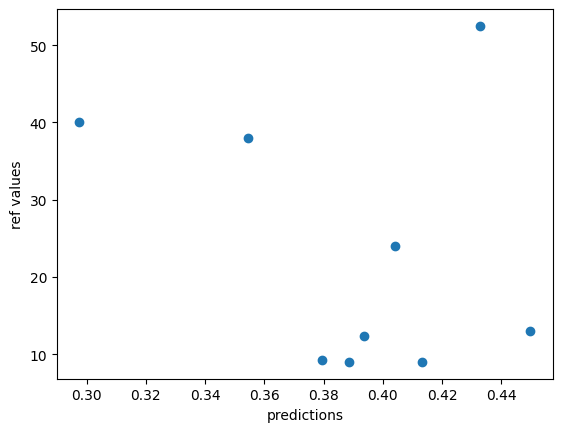

In [ ]:
#plt.scatter(all_df_pred.EVI,resp_var)
plt.scatter(all_df_pred_final.EVI,resp_var)
plt.xlabel('predictions')
plt.ylabel('ref values')

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# Create a Random Forest regressor
rf = RandomForestRegressor(n_estimators=50)


resp_df = pd.DataFrame(index=all_df_pred_final.index, data = resp_var, columns=['resp'])

resp_df

,resp
0,38.0
1,24.0
2,12.4
3,9.0
4,13.0
5,9.2
6,9.0
7,52.5
8,40.0


In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(all_df_pred, resp_df, test_size=0.5, random_state=42)  # for large sample sizes (ignore here)

X_train = all_df_pred_final
y_train = resp_df

rf.fit(X_train, y_train)

# Make prediction
predictions = rf.predict(X_train)

<ipython-input-140-9061f793c008>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


In [ ]:
predictions

array([29.724, 20.22 , 14.536, 10.924, 14.278, 12.944, 20.048, 36.936,
       32.744])

In [ ]:
resp_df

,resp
0,38.0
1,24.0
2,12.4
3,9.0
4,13.0
5,9.2
6,9.0
7,52.5
8,40.0


In [ ]:
resp_df.to_csv('Litter_depth_vs_Predictions_from_RF_Analysis.csv')

In [ ]:
# Import library for metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [ ]:
""" evaluate model """

# Mean absolute error (MAE)
mae2 = mean_absolute_error(y_train.values.ravel(), predictions)

# Mean squared error (MSE)
mse2 = mean_squared_error(y_train.values.ravel(), predictions)

# R-squared scores
r2_2 = r2_score(y_train.values.ravel(), predictions)

# Print metrics
print('Mean Absolute Error:', round(mae2, 2))
print('Mean Squared Error:', round(mse2, 2))
print('R-squared scores:', round(r2_2, 2))

Mean Absolute Error: 6.11
Mean Squared Error: 58.18
R-squared scores: 0.76


<ipython-input-146-1ce3187b7ceb>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


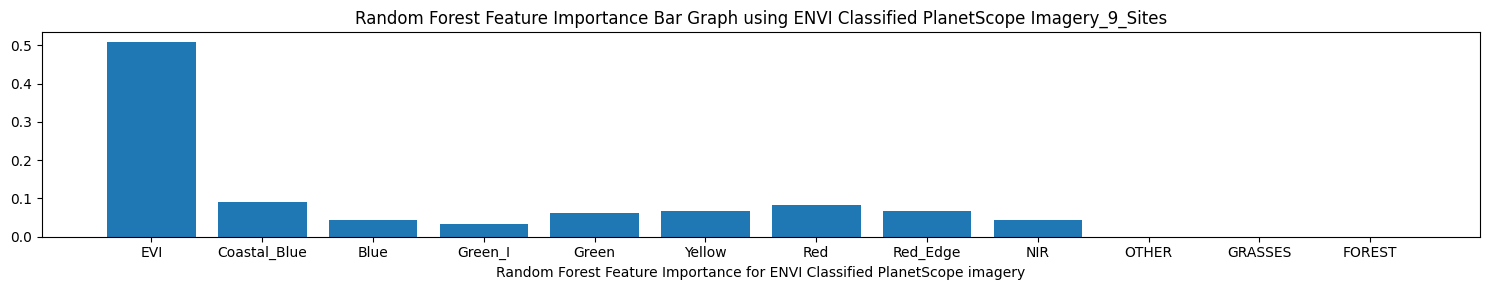

In [ ]:
# Train the model

# X_train = all_df_pred
# y_train = resp_df

rf.fit(X_train, y_train)


fig, ax = plt.subplots(figsize=(15, 3))
X_Variables = X_train.columns
plt.bar(X_Variables, rf.feature_importances_, orientation = 'vertical')
plt.xlabel("Random Forest Feature Importance for ENVI Classified PlanetScope imagery")
plt.title('Random Forest Feature Importance Bar Graph using ENVI Classified PlanetScope Imagery_9_Sites')

plt.tight_layout()

In [ ]:
slope, intercept = np.polyfit(predictions, y_train, 1)

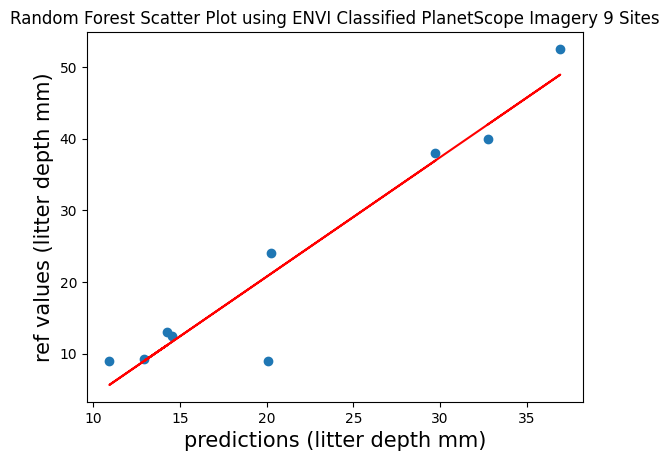

In [ ]:
plt.scatter(predictions,y_train)
plt.xlabel('predictions (litter depth mm)', fontsize=15)
plt.ylabel('ref values (litter depth mm)', fontsize=15)
plt.title('Random Forest Scatter Plot using ENVI Classified PlanetScope Imagery 9 Sites')
plt.plot(predictions, slope * predictions + intercept, color='red')
plt.savefig('Random Forest Scatter Plot Using ENVI Classified PlanetScope Imagery 9 Sites.png')